In [75]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np 
from typing import Final 
import h5py
import matplotlib.pyplot as plt
import time 
import xarray as xr
from utils import plot_bias
import gc 


In [76]:
sfc_vars_remove = (17, 18, 19, 20, 21)

fpath_lbd_qn = "saved_models/lbd_qn.txt"
fpath_lbd_qc = "saved_models/lbd_qc.txt"
fpath_lbd_qi = "saved_models/lbd_qi.txt"

save_dir = "/data/climsim-online/shared_e3sm/saved_models/wrapper_ftorch/"
data_path = "/data/ClimSim/hu_etal2024_data/"
lbd_qn  =  np.loadtxt(fpath_lbd_qn, delimiter=",", dtype=np.float32)
lbd_qc  =  np.loadtxt(fpath_lbd_qc, delimiter=",", dtype=np.float32)
lbd_qi  =  np.loadtxt(fpath_lbd_qi, delimiter=",", dtype=np.float32)

In [94]:
fdir_bsc = "/media/peter/CrucialBX500/data/BSC_mount/ClimSim/rnn/saved_models/"
model_path_script = fdir_bsc + "LSTM-Hidden_lr0.0007.neur144-144_xv4_yv4_num2515_ep79_val0.0489_script.pt"
qinput_prune, snowhice_fix, v5_input, mp_constraint, nmem, nlev_mem, perturb = True, True, False, True, 16, 60, False

model_path_script = "saved_models/LSTM-Hidden_lr0.001.neur128-128_xv4_yv5_num25949_script_cuda.pt"
qinput_prune, snowhice_fix, v5_input, mp_constraint, nmem, nlev_mem, perturb = True, True, False, True, 16, 60, False

model_path_script = fdir_bsc + "LSTM-Hidden_lr0.0007.neur144-144_xv4_yv4_num36534_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, mp_constraint, nmem, nlev_mem, perturb = True, True, False, False, 16, 60, False

model_path_script = fdir_bsc + "LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num62905_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, mp_constraint, nmem, nlev_mem, perturb = True, True, False, False, 16, 60, False

model_path_script = fdir_bsc + "LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num51230_script_cpu.pt" 
qinput_prune, snowhice_fix, v5_input, mp_constraint, nmem, nlev_mem, perturb = True, True, False, False, 16, 60, False

model_path_script = fdir_bsc + "LSTM-Hidden_lr0.0007.neur144-144_xv4_mp-1_num88067_script_cpu.pt" 
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

model_path_script = fdir_bsc + "SRNN-Hidden_lr0.0007.neur144-144_xv4_mp0_num72844_script_cpu.pt"  # ar1_0.7
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-144_xv4_mp0_num70753_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

rh_prune = True


# new CRPS
# 40289
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num94940_script_cpu.pt"
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num35215_script_cpu.pt" #ens3
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

# newCRPS noprevt
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num1814_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-96_xv4_mp0_num49489_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

# old CRPS

model_path_script = "saved_models/SRNN-Hidden_lr0.0007.neur144-144_xv4_mp0_num72844_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

# mp1 physprec  noprecloss
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp1_num46497_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

# srules-CRPS-sumvar_partiallystochastic_SLSTM4-160-96_..1234566..7_hcon1e-3_TSTEPwcon2.5e9_wprec6e16  only 6 epochs
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num95044_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

# srules-CRPS-sumvar_partiallystochastic_SLSTM4-160-96_..1234566..7_hcon1e-3_TSTEPwcon2.5e9_wprec6e16  only 6 epochs
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num95044_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 16, 60, False

# ens3_prevprec_srules-CRPS-sumvar_partiallystochastic_SLSTM4-144-96_..123344..10_hcon2e-3_wcon5e9
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-96_xv4_mp0_num49489_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 18, 60, False

model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num45236_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 18, 60, False

# det, ymem=mixed 
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num23016_script_cpu.pt"
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num82966_script_cpu.pt" #
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb = True, True, False, 18, 60, False

# ens3 noprevy
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.001.neur160-96_xv4_mp0_num55005_script_cpu.pt" #
#qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb, rh_prune = True, True, False, 18, 60, False, False
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num30754_script_cpu.pt" #

model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num50592_script_cpu.pt" #
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb, rh_prune = True, True, False, 18, 60, False, True
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num14122_script_cpu.pt" #
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num52190_script_cpu.pt"

# ens5 noprevy
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num34142_script_cpu.pt"
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb, rh_prune = True, True, False, 18, 60, False, False
# ens4 noprevy biasloss
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num20693_script_cpu.pt"

model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num49330_script_cpu.pt"
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num98918_script_cpu.pt"
# cont 49330
#model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-96_xv4_mp0_num97969_script_cpu.pt"

# ep16 noprevy-sfcmem,soap,ens6_srules-CRPS-sumvar_partstoch_SLSTM4-160-128_hcon2e-3_wcon2e10(tstep=1)_wbias5e3_122..8
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num92127_script_cpu.pt"

# strangely good CRPS-mean model thats not really stochastic (but no hcon, wcon)
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur160-128_xv4_mp0_num21746_script_cpu.pt"

# det, ymem=mixed LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num51981.pt ep14
#qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb, rh_prune = True, True, False, 18, 50, False, True
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num51981_script_cpu.pt"
# nlev_mem = 50, needs to be changed in src code
#model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur144-144_xv4_mp0_num70730_script_cpu.pt" # cont

# cont_LSTM160-144_mp0_huber_TrReplay=Mixed,valreplay=full   NO WCON,ECON
qinput_prune, snowhice_fix, v5_input, nmem, nlev_mem, perturb, rh_prune = True, True, False, 18, 60, False, False
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur160-144_xv4_mp0_num2840_script_cpu.pt" 
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur160-144_xv4_mp0_num30315_script_cpu.pt" 
model_path_script = "saved_models/LSTM-Hidden_lr0.0007.neur160-144_xv4_mp0_num7886_script_cpu.pt" 

 # partiallystochasticRNN-Hidden_lr0.0007.neur144-96_xv4_mp0_num26724.pt
model_path_script = "saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-96_xv4_mp0_num26724_script_cpu.pt" 


In [95]:
return_det = False # only valid for perturbation models

In [97]:
mp_mode = int(model_path_script.split('mp')[-1][0:3].split('_')[0])

if mp_mode==0: # predict qliq, qice
    mp_constraint = False 
    pred_liq_ratio = False
elif mp_mode>0: # predict qn, DIAGNOSE liquid fraction
    mp_constraint = True 
    pred_liq_ratio = False
else: # < 0  predict qn and liquid fraction
    mp_constraint = True       
    pred_liq_ratio = True 

print(model_path_script)
if "stochastic" in model_path_script or "SRNN" in model_path_script:
    nens=5
    print("Model is stochastic")
else:
    nens=1
    print("Model is deterministic") 
    
if "gpu" in model_path_script or "cuda" in model_path_script:
    use_gpu = True 
else:
    use_gpu = False 
    
model = torch.jit.load(model_path_script)

try:
    use_ar_noise = model.use_ar_noise
    print("use_ar_noise IS defined in model, setting to {}".format(use_ar_noise))
except:
    print("use_ar_noise not defined in model, setting to false")
    use_ar_noise = False

nmem = model.nh_mem
print("nmem:", nmem)

saved_models/partiallystochasticRNN-Hidden_lr0.0007.neur144-96_xv4_mp0_num26724_script_cpu.pt
Model is stochastic
use_ar_noise IS defined in model, setting to False
nmem: 14


In [99]:
class NewModel_constraint(nn.Module):
    qinput_prune: Final[bool]
    rh_prune: Final[bool]
    snowhice_fix: Final[bool]
    v5_input: Final[bool]
    mp_constraint: Final[bool]
    predict_liq_ratio: Final[bool]
    perturb: Final[bool]
    return_det: Final[bool]
    
    def __init__(self, original_model, 
                 lbd_qc, lbd_qi, lbd_qn,
                 qinput_prune, rh_prune,
                 snowhice_fix, v5_input, mp_constraint, 
                 predict_liq_ratio,
                 perturb, return_det, device):
        
        super(NewModel_constraint, self).__init__()
        self.original_model = original_model
        self.lbd_qc     = torch.tensor(lbd_qc, dtype=torch.float32, device=device)
        self.lbd_qi     = torch.tensor(lbd_qi, dtype=torch.float32, device=device)
        self.lbd_qn     = torch.tensor(lbd_qn, dtype=torch.float32, device=device)

        self.hardtanh = nn.Hardtanh(0.0, 1.0)
        self.qinput_prune = qinput_prune
        self.rh_prune = rh_prune
        self.snowhice_fix = snowhice_fix
        self.v5_input = v5_input
        self.mp_constraint = mp_constraint  
        self.perturb = perturb
        self.return_det = return_det
        self.nmem = nmem
        self.predict_liq_ratio = predict_liq_ratio
        self.xmean_lev      = self.original_model.xmean_lev.to(device)
        self.xdiv_lev       = self.original_model.xdiv_lev.to(device)
        self.xmean_sca      = self.original_model.xmean_sca.to(device)
        self.xdiv_sca       = self.original_model.xdiv_sca.to(device)
        self.yscale_lev     = self.original_model.yscale_lev.to(device)
        self.yscale_sca     = self.original_model.yscale_sca.to(device)

    def preprocessing(self, x_main0, x_sfc0):
        # v4 input array
        x_main = x_main0.clone()
        x_sfc = x_sfc0.clone()
        
        # for i in range(x_main.shape[-1]):
        #     print("i", i, "min max", np.min(x_main[:,:,i]), np.max(x_main[:,:,i]))
        # for i in range(x_sfc.shape[-1]):
        #     print("i", i, "min max sfc", np.min(x_sfc[:,i]), np.max(x_sfc[:,i]))
        if self.snowhice_fix:
            x_sfc = torch.where(torch.ge(x_sfc,1e10), torch.tensor(-1.0), x_sfc)
            
        if self.v5_input:
            # v5 inputs
            qn   = x_main[:,:,2]  + x_main[:,:,3]
            if self.qinput_prune:
                qn[:,0:15] = 0.0
            qn = 1 - torch.exp(-qn * self.lbd_qn)
            x_main[:,:,2] = qn
            liq_frac_constrained  = self.temperature_scaling(x_main[:,:,0])
            x_main[:,:,3] = liq_frac_constrained

            #                            mean     max - min
            # x_main = (x_main - self.xmean_lev)/(self.xdiv_lev)
            # x_sfc =  (x_sfc -  self.xmean_sca)/(self.xdiv_sca)
            x_main = (x_main - self.xmean_lev)/(self.xdiv_lev)
            x_sfc =  (x_sfc -  self.xmean_sca)/(self.xdiv_sca)
            
            # if self.qinput_prune:
            #     x_main[:,0:15,2] = 0.0
                
        else:
            # v4 inputs
            x_main[:,:,2] = 1 - torch.exp(-x_main[:,:,2] * self.lbd_qc)
            x_main[:,:,3] = 1 - torch.exp(-x_main[:,:,3] * self.lbd_qi)   
            
            #                            mean     max - min
            # x_main = (x_main - self.xmean_lev)/(self.xdiv_lev)
            # x_sfc =  (x_sfc -  self.xmean_sca)/(self.xdiv_sca)
            x_main = (x_main - self.xmean_lev)/(self.xdiv_lev)
            x_sfc =  (x_sfc -  self.xmean_sca)/(self.xdiv_sca)
            
            if self.qinput_prune:
                x_main[:,0:15,2:3] = 0.0
        # clip RH 
        if self.rh_prune:
            x_main[:,:,1] = torch.clamp(x_main[:,:,1], 0, 1.2)

        x_main = torch.where(torch.isnan(x_main), torch.tensor(0.0, device=x_main.device), x_main)
        x_main = torch.where(torch.isinf(x_main), torch.tensor(0.0, device=x_main.device), x_main)
        return x_main, x_sfc 
    
    def temperature_scaling(self, T_raw):
        liquid_ratio = (T_raw - 253.16) * 0.05 
        liquid_ratio = F.hardtanh(liquid_ratio, 0.0, 1.0)
        return liquid_ratio
    
    def postprocessing(self, out, out_sfc):
        out             = out / self.yscale_lev
        out_sfc         = out_sfc / self.yscale_sca
        return out, out_sfc
        
    def pp_mp(self, out, out_sfc, x_denorm):

        # out_denorm      = out / self.yscale_lev.to(device=out.device)
        # out_sfc_denorm  = out_sfc / self.yscale_sca.to(device=out.device)
        out_denorm      = out / self.yscale_lev
        out_sfc_denorm  = out_sfc / self.yscale_sca

        T_before        = x_denorm[:,:,0:1]
        qliq_before     = x_denorm[:,:,2:3]
        qice_before     = x_denorm[:,:,3:4]   
        qn_before       = qliq_before + qice_before 

        # print("shape x denorm", x_denorm.shape, "T", T_before.shape)
        T_new           = T_before  + out_denorm[:,:,0:1]*1200

        # T_new           = T_before  + out_denorm[:,:,0:1]*1200
        liq_frac_constrained    = self.temperature_scaling(T_new)

        if self.predict_liq_ratio:
            liq_frac_pred = out_denorm[:,:,3:4]
            # print("min max lfrac pred raw", torch.max(liq_frac_pred).item(), torch.min(liq_frac_pred).item())
            # Hu et al. Fig 2 b:
            max_frac = torch.clamp(liq_frac_constrained + 0.2, max=1.0)
            min_frac = torch.clamp(liq_frac_constrained - 0.2, min=0.0)
            # print("shape lfracpre", liq_frac_pred.shape, "con", liq_frac_constrained.shape)
            liq_frac_constrained = torch.clamp(liq_frac_pred, min=min_frac, max=max_frac)
            
            # print("min max lfrac pred pp", torch.max(liq_frac_constrained).item(), torch.min(liq_frac_constrained).item())

        #                            dqn
        qn_new      = qn_before + out_denorm[:,:,2:3]*1200  
        qliq_new    = liq_frac_constrained*qn_new
        qice_new    = (1-liq_frac_constrained)*qn_new
        # print("min max qice_new pred pp", torch.max(qice_new).item(), torch.min(qice_new).item())
        # print("min max qice_bf pred pp", torch.max(qice_before).item(), torch.min(qice_before).item())

        dqliq       = (qliq_new - qliq_before) * 0.0008333333333333334 #/1200  
        dqice       = (qice_new - qice_before) * 0.0008333333333333334 #/1200   
        if self.predict_liq_ratio:           # replace    dqn,   liqfrac
            out_denorm  = torch.cat((out_denorm[:,:,0:2], dqliq, dqice, out_denorm[:,:,4:]),dim=2)
        else:
            out_denorm  = torch.cat((out_denorm[:,:,0:2], dqliq, dqice, out_denorm[:,:,3:]),dim=2)
        
        return out_denorm, out_sfc_denorm

    if use_ar_noise:
        def forward(self, x_main0, x_sfc0, rnn1_mem, eps_prev):            

            x_main, x_sfc = self.preprocessing(x_main0, x_sfc0)
        
            if self.perturb:
                out_lev, out_sfc, rnn1_mem, out_lev_det, eps_prev = self.original_model(x_main, x_sfc, rnn1_mem, eps_prev)
            else:
                out_lev, out_sfc, rnn1_mem, eps_prev = self.original_model(x_main, x_sfc, rnn1_mem, eps_prev)
        

            if self.mp_constraint:
                out_lev, out_sfc = self.pp_mp(out_lev, out_sfc, x_main0)
                if self.perturb:
                    out_lev_det, out_sfc_tmp = self.pp_mp(out_lev_det, out_sfc, x_main0)
            else:
                out_lev      = out_lev / self.yscale_lev
                out_sfc      = out_sfc / self.yscale_sca
                if self.perturb and self.return_det:
                    out_lev_det      = out_lev_det / self.yscale_lev
                    
            out_lev = torch.where(torch.isnan(out_lev), torch.tensor(0.0, device=x_main.device), out_lev)
            if self.perturb and self.return_det:
                out_lev_det = torch.where(torch.isnan(out_lev_det), torch.tensor(0.0, device=x_main.device), out_lev_det)
                return out_lev, out_lev_det, out_sfc, rnn1_mem, eps_prev
            else:
                return out_lev, out_sfc, rnn1_mem, eps_prev
    else:
        def forward(self, x_main0, x_sfc0, rnn1_mem):
            
            x_main, x_sfc = self.preprocessing(x_main0, x_sfc0)
        
            if self.perturb:
                out_lev, out_sfc, rnn1_mem, out_lev_det = self.original_model(x_main, x_sfc, rnn1_mem)
            else:
                out_lev, out_sfc, rnn1_mem = self.original_model(x_main, x_sfc, rnn1_mem)
        
            if self.mp_constraint:
                out_lev, out_sfc = self.pp_mp(out_lev, out_sfc, x_main0)
                if self.perturb:
                    out_lev_det, out_sfc_tmp = self.pp_mp(out_lev_det, out_sfc, x_main0)
            else:
                out_lev      = out_lev / self.yscale_lev
                out_sfc      = out_sfc / self.yscale_sca
                if self.perturb and self.return_det:
                    out_lev_det      = out_lev_det / self.yscale_lev
                    

            out_lev = torch.where(torch.isnan(out_lev), torch.tensor(0.0, device=x_main.device), out_lev)
            if self.perturb and self.return_det:
                out_lev_det = torch.where(torch.isnan(out_lev_det), torch.tensor(0.0, device=x_main.device), out_lev_det)
                return out_lev, out_lev_det, out_sfc, rnn1_mem
            else:
                return out_lev, out_sfc, rnn1_mem

if use_gpu:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

model = model.to(device)

nx = model.xmean_lev.shape[1]
if nx == 20:
    print("Model has 20 level wise inputs, assuming previous tendencies are used")
    use_previous_tendencies = True 
elif nx == 15:
    print("Model has 15 level wise inputs, assuming previous tendencies are NOT used")
    use_previous_tendencies = False 
else:
    raise NotImplementedError("check number of level-wise inputs: {}, possibly not supported".format(nx))

new_model = NewModel_constraint(model, lbd_qc, lbd_qi, lbd_qn, 
                                qinput_prune, rh_prune, 
                                snowhice_fix, v5_input, mp_constraint, pred_liq_ratio,
                                perturb, return_det, device)
# device = torch.device("cpu")
new_model = new_model.to(device)

# with torch.jit.optimized_execution(True):
scripted_model = torch.jit.script(new_model)
scripted_model = scripted_model.eval()

Model has 20 level wise inputs, assuming previous tendencies are used


In [100]:
# save model with wrapper to torchscript 
save = True

if use_gpu:
    save_file_torch = save_dir + model_path_script.split("/")[-1].split(".pt")[0] + "_cuda.pt"
else:
    save_file_torch = save_dir + model_path_script.split("/")[-1].split(".pt")[0] + ".pt"

if save:
    print("saving to ", save_file_torch)
    scripted_model.save(save_file_torch)
    print("success")

saving to  /data/climsim-online/shared_e3sm/saved_models/wrapper_ftorch/partiallystochasticRNN-Hidden_lr0.0007.neur144-96_xv4_mp0_num26724_script_cpu.pt
success


In [14]:
# for models which use previous tendencies as input, evaluate autoregressively or use past true tendencies?
autoregressive_eval = False
#autoregressive_eval = True

In [15]:
fpath_data = '/data/ClimSim/data_v4_rnn_nonorm_year8_nocompress_chunk3.h5'
# (26278, 384, 60, 15)

hf = h5py.File(fpath_data, 'r')
bsize = 384 
# nb = 2160

nb = 1400
# nb = 500

nlev = 60
# nlev = 50
offset = 0
offset = 22000 

ns = nb * bsize

x_lev_np = hf['input_lev'][offset:offset+nb]
x_sfc_np = hf['input_sca'][offset:offset+nb]
x_sfc_np = np.delete(x_sfc_np,sfc_vars_remove,axis=2)
y_lev_np = hf['output_lev'][offset:offset+nb]
y_sfc_np = hf['output_sca'][offset:offset+nb]

if use_previous_tendencies:
    prev_outputs = hf['output_lev'][offset-1:offset+nb-1]
    prev_outputs = prev_outputs[:,:,:,[0,1,2,3,4]]
    x_lev_np = np.concatenate((x_lev_np, prev_outputs),axis=-1)

hf.close()

xlev = torch.from_numpy(x_lev_np).to(device)
xsfc = torch.from_numpy(x_sfc_np).to(device)

if use_ar_noise:
    #eps_prev = torch.rand(nlev, bsize, model.nh_rnn2,device=xlev.device)
    eps_prev = torch.rand(2, nlev, bsize, model.nh_rnn1,device=xlev.device)

    eps_prev.requires_grad = False 

outs_lev = []
outs_sfc = []
outs_lev_det = []

t0_it = time.time()

for i in range(nens):
    ntime = nb 
    j = 0 
    rnn1_mem = torch.zeros((bsize, nlev_mem, nmem),device=xlev.device)
    
    for jj in range(ntime):
        jend = j + bsize
        # out_test = scripted_model(xlev,xsfc)
        # x0 = xlev[j:jend]
        # x1 = xsfc[j:jend]
        x0 = xlev[jj,:]
        x1 = xsfc[jj,:]
        # print(rnn1_mem[0,0,0], rnn1_mem[4,30,10])
        
        with torch.no_grad(): 
            if use_ar_noise:
                if perturb:
                    out_lev, out_lev_det, out_sfc, rnn1_mem, eps_prev = scripted_model(x0,x1,rnn1_mem,eps_prev)
                    outs_lev_det.append(out_lev_det)
                else:
                    out_lev, out_sfc, rnn1_mem, eps_prev = scripted_model(x0,x1,rnn1_mem,eps_prev)   
            else:
                if perturb:
                    out_lev, out_lev_det, out_sfc, rnn1_mem = scripted_model(x0,x1,rnn1_mem)
                    outs_lev_det.append(out_lev_det)
                else:
                    out_lev, out_sfc, rnn1_mem = scripted_model(x0,x1,rnn1_mem)
            outs_lev.append(out_lev)
            outs_sfc.append(out_sfc)
            # rnn1_mem = torch.reshape(out_test[:,368:], (bsize,nlev_mem,nmem))
        if autoregressive_eval and use_previous_tendencies and jj<(ntime-1):
            xlev[jj+1,:,:,-5:] = out_lev[:,:,0:5]
        j = j + bsize
    
elaps = time.time() - t0_it
print(" took {:.1f}s".format(elaps))

outs_lev = torch.stack(outs_lev)
outs_sfc = torch.stack(outs_sfc)

if perturb:
    outs_lev_det = torch.stack(outs_lev_det)
    outs_lev_det = outs_lev_det.detach().numpy().reshape(nens,-1,384,60,6)

outs_lev = outs_lev.detach().numpy().reshape(nens,-1,384,60,6)
outs_sfc = outs_sfc.detach().numpy().reshape(nens,-1,384,8)
prec_true = y_sfc_np[:,:,3]
prec_pred = outs_sfc[0,:,:,3]

outs_lev_std = np.std(outs_lev,axis=0)

gc.collect()

# y_true = y_lev_np.reshape(-1,384,60,6)
# y_pred = outs_lev.reshape(-1,384,60,6)
y_true = y_lev_np 
y_pred = outs_lev[0]

 took 80.9s


In [16]:
print(y_true.shape, y_pred.shape)

(1400, 384, 60, 6) (1400, 384, 60, 6)


In [24]:
print(outs_lev[0].mean(), outs_lev[1].mean())

-2.6458306e-07 -2.6459068e-07


In [39]:
import torch.nn.functional as F

qliq_before     = x_lev_np[:,:,:,2]
qice_before     = x_lev_np[:,:,:,3]   
qn_before       = qliq_before + qice_before 

dqliq = y_lev_np[:,:,:,2]
dqice = y_lev_np[:,:,:,3]  
dqn =  dqliq + dqice

qn_new          = qn_before + dqn*1200  
qliq_new        = qliq_before + dqliq*1200
# qice_new        = qice_before + dqice*1200

inds = np.nonzero(qn_new)
liq_frac = np.zeros_like(qn_new)
liq_frac[inds] = qliq_new[inds] / qn_new[inds]

liq_frac[liq_frac<0.0] = 0.0
liq_frac[liq_frac>1.0] = 1.0


            

In [49]:
temp = xlev[:,:,:,0]
temp = temp +  ylev[:,:,:,0]*1200
temp.mean()
liq_frac_hu = (temp - 253.16) * 0.05 
liq_frac_hu = F.hardtanh(liq_frac_hu, 0.0, 1.0)
liq_frac_hu = liq_frac_hu.numpy()

In [46]:
ylev.shape

torch.Size([1400, 384, 60, 6])

In [ ]:
plt.hist(liq_frac.flatten(),bins=20)

(array([3.8804900e+06, 2.4522200e+05, 2.5742100e+05, 2.7722300e+05,
        3.3416200e+05, 3.9258500e+05, 4.2318400e+05, 4.1383300e+05,
        4.1073800e+05, 2.6349900e+06, 2.2836186e+07, 1.3090000e+04,
        8.5490000e+03, 4.1690000e+03, 2.9930000e+03, 2.8340000e+03,
        1.4660000e+03, 1.2070000e+03, 1.0590000e+03, 1.1459900e+05]),
 array([-1.        , -0.89999998, -0.80000001, -0.69999999, -0.60000002,
        -0.5       , -0.39999998, -0.30000001, -0.19999999, -0.09999996,
         0.        ,  0.10000002,  0.20000005,  0.30000007,  0.39999998,
         0.5       ,  0.60000002,  0.70000005,  0.80000007,  0.89999998,
         1.        ]),
 <BarContainer object of 20 artists>)

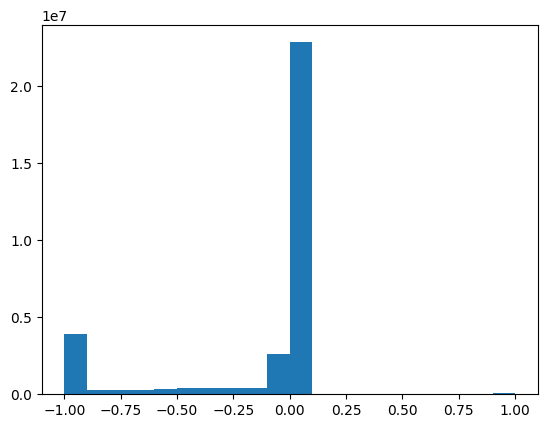

In [52]:
plt.hist(liq_frac.flatten()-liq_frac_hu.flatten(),bins=20)

In [54]:
diff = liq_frac - liq_frac_hu 
print(diff.min(), diff.max(), diff.mean())

-1.0 1.0 -0.15585405


In [56]:
np.corrcoef(liq_frac.flatten(), liq_frac_hu.flatten())

array([[1.       , 0.6374986],
       [0.6374986, 1.       ]])

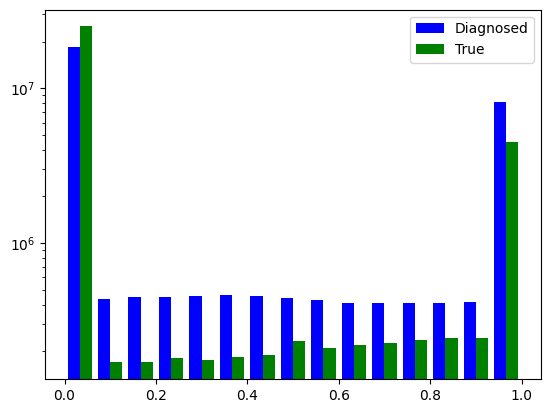

In [55]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([liq_frac_hu.flatten(),liq_frac.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['Diagnosed','True'])

In [37]:
for j in range(0,60):
    print(liquid_ratio_true[0,0,j],liquid_ratio[0,0,j]) 

tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.2984)
tensor(0.) tensor(0.5489)
tensor(0.) tensor(0.4095)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(3.5133e-27) tensor(0.)
tensor(-0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(-0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(-0.) tensor(0.)
tensor(0.) tensor(0.)
tensor(-0.) tensor(0.)
tensor(-0.) tensor(0.)
tensor(-0.) tensor(0.)
tensor(-0.) tensor(0.)
tensor(-9.8540e-35) tensor(0.)
tensor(5.8069e-30) tensor(0.)
tensor(6.7432e-26) tensor(0.)
tensor(2.0275e-22) tensor(0.)
tensor(4.7439e-18) tensor(0.)
tensor(3.0922e-16) tensor(0.)
tensor(-0.) tensor(0.)
tensor(0.0002) tensor(0.)
tensor(0.0065) tensor(0.)
tensor(0.0183) tensor(0.)
tensor(0.1218) tensor(0.1586)
tensor(0.2872) tensor(0.3193)
tensor(0.4316) tensor(0.4700)
tensor(0.4081) tensor(0.6162)
tensor(0.5804) tensor(0.7478)
tensor(0.7267

In [13]:
cltot_pred = outs_lev[:,:,:,:,2] + outs_lev[:,:,:,:,3]
cltot_lev_std = np.std(cltot_pred,axis=0)
r2_cltot_wv_z = np.corrcoef(cltot_lev_std.flatten(), outs_lev_std[:,:,:,1].flatten())[0,1]
print("Correlation between water vapor stochasticity and cloud water stochasticity: {} ".format(r2_cltot_wv_z))


NameError: name 'outs_lev' is not defined

In [16]:
print("Correlation between water vapor tendency and precipitation")
wv_tend_int_true = np.sum(y_true[:,:,:,1],axis=2)
wv_tend_int_pred = np.sum(y_pred[:,:,:,1],axis=2)
print(wv_tend_int_true.shape)
print(prec_true.shape)

r2_true = np.corrcoef(wv_tend_int_true.flatten(), prec_true.flatten())[0,1]
r2_pred = np.corrcoef(wv_tend_int_pred.flatten(), prec_pred.flatten())[0,1]
print("True: {}, pred: {}".format(r2_true, r2_pred))


Correlation between water vapor tendency and precipitation
(1400, 384)
(1400, 384)
True: -0.8342216693521806, pred: -0.8284687605449937


In [79]:
temp = x_lev_np[:,:,:,0]
sp = x_sfc_np[:,:,0]

print(sp.shape, sp.min(), sp.max())
print(temp.shape, temp.min(), temp.max())

data_path = '/data/ClimSim/hu_etal2024_data/'
data_path_docker = "/data/climsim-online/scratch/"

grid_path = '../grid_info/ClimSim_low-res_grid-info.nc'
grid_info = xr.open_dataset(grid_path)
level = grid_info.lev.values
nlev = level.shape[0]

hyam = grid_info['hyam'].values
hybm = grid_info['hybm'].values
hyam = np.reshape(hyam,(1,1,nlev))
hybm = np.reshape(hybm,(1,1,nlev))

sp = sp.reshape((sp.shape[0],sp.shape[1],1))

pres =   hyam*100000.0 + sp*hybm
print(pres.min(), pres.max())

(1400, 384) 73336.26 103766.87
(1400, 384, 60) 171.93896 310.36487
7.834781133863082 102996.49578079407


In [97]:
print(temp.min(), temp.max())
pres_ref = 100000.0
exponent = 0.286
theta = temp*(pres_ref/pres)**exponent
print(theta.shape)
print(theta.min(), theta.max())
print(theta[:,:,10:].min(), theta[:,:,10:].max())

171.93896 310.36487
(1400, 384, 60)
241.5778044588775 3714.1193642504445
241.5778044588775 860.6083391143778


In [91]:
level

array([7.83478113e-02, 1.41108318e-01, 2.52923297e-01, 4.49250635e-01,
       7.86346161e-01, 1.34735576e+00, 2.24477729e+00, 3.61643148e+00,
       5.61583643e+00, 8.40325322e+00, 1.21444894e+01, 1.70168280e+01,
       2.32107981e+01, 3.09143463e+01, 4.02775807e+01, 5.13746323e+01,
       6.41892284e+01, 7.86396576e+01, 9.46300920e+01, 1.12091274e+02,
       1.30977804e+02, 1.51221318e+02, 1.72673905e+02, 1.95087710e+02,
       2.18155935e+02, 2.41600379e+02, 2.65258515e+02, 2.89122322e+02,
       3.13312087e+02, 3.38006999e+02, 3.63373492e+02, 3.89523338e+02,
       4.16507922e+02, 4.44331412e+02, 4.72957206e+02, 5.02291917e+02,
       5.32152273e+02, 5.62239392e+02, 5.92149276e+02, 6.21432841e+02,
       6.49689897e+02, 6.76656485e+02, 7.02242188e+02, 7.26498589e+02,
       7.49537645e+02, 7.71445217e+02, 7.92234260e+02, 8.11856675e+02,
       8.30259643e+02, 8.47450653e+02, 8.63535902e+02, 8.78715875e+02,
       8.93246018e+02, 9.07385213e+02, 9.21354397e+02, 9.35316717e+02,
      

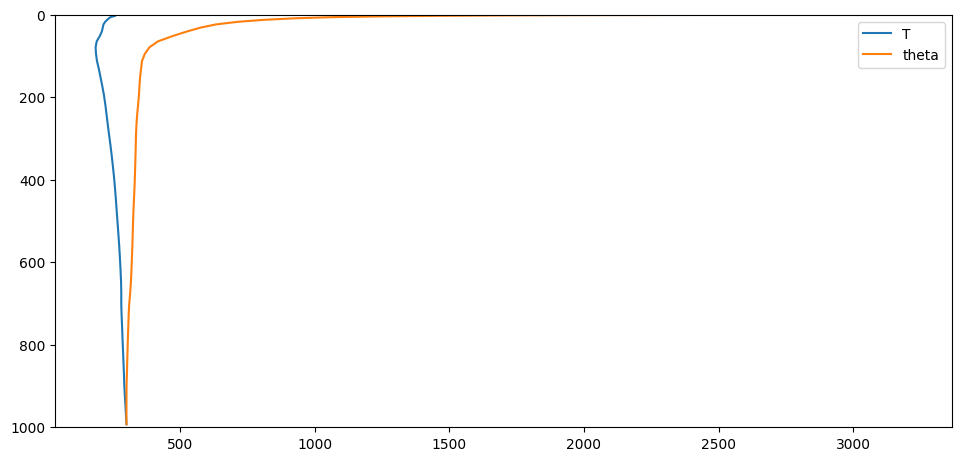

In [88]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(9.5, 4.5),
                        layout="constrained")
axs.plot(temp[0,100,:],level)
axs.plot(theta[0,100,:],level)
axs.legend(['T','theta'])
axs.set_ylim(0,1000)
axs.invert_yaxis()


In [96]:
print(100*level)
print(pres[0,100])
print(temp[0,100,:])
print(theta[0,100,:])

[7.83478113e+00 1.41108318e+01 2.52923297e+01 4.49250635e+01
 7.86346161e+01 1.34735576e+02 2.24477729e+02 3.61643148e+02
 5.61583643e+02 8.40325322e+02 1.21444894e+03 1.70168280e+03
 2.32107981e+03 3.09143463e+03 4.02775807e+03 5.13746323e+03
 6.41892284e+03 7.86396576e+03 9.46300920e+03 1.12091274e+04
 1.30977804e+04 1.51221318e+04 1.72673905e+04 1.95087710e+04
 2.18155935e+04 2.41600379e+04 2.65258515e+04 2.89122322e+04
 3.13312087e+04 3.38006999e+04 3.63373492e+04 3.89523338e+04
 4.16507922e+04 4.44331412e+04 4.72957206e+04 5.02291917e+04
 5.32152273e+04 5.62239392e+04 5.92149276e+04 6.21432841e+04
 6.49689897e+04 6.76656485e+04 7.02242188e+04 7.26498589e+04
 7.49537645e+04 7.71445217e+04 7.92234260e+04 8.11856675e+04
 8.30259643e+04 8.47450653e+04 8.63535902e+04 8.78715875e+04
 8.93246018e+04 9.07385213e+04 9.21354397e+04 9.35316717e+04
 9.49378056e+04 9.63599599e+04 9.78013432e+04 9.92635544e+04]
[7.83478113e+00 1.41108318e+01 2.52923297e+01 4.49250635e+01
 7.86346161e+01 1.34735

Text(0.5, 0.98, 'Histogram of precipitation')

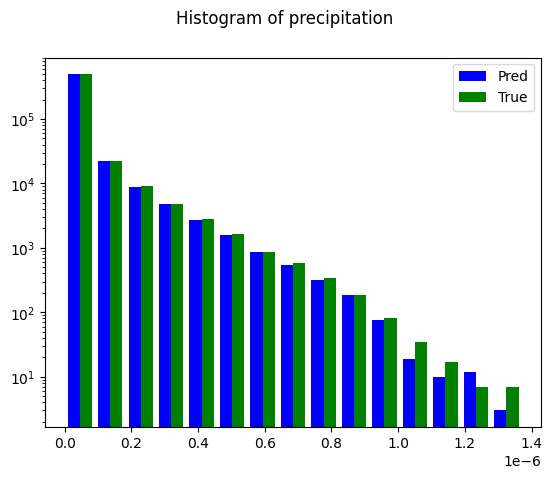

In [118]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([prec_pred.flatten(),prec_true.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of precipitation")
# srules-CRPS-sumvar_partiallystochastic_SLSTM4-160-96_..1234566..7_hcon1e-3_TSTEPwcon2.5e9_wprec6e16  95044


Text(0.5, 0.98, 'Histogram of precipitation, autoregressive evaluation')

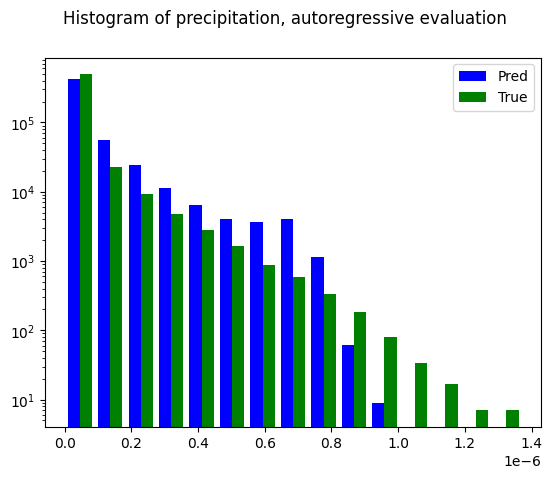

In [131]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([prec_pred.flatten(),prec_true.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of precipitation, autoregressive evaluation")
# srules-CRPS-sumvar_partiallystochastic_SLSTM4-160-96_..1234566..7_hcon1e-3_TSTEPwcon2.5e9_wprec6e16  95044


Text(0.5, 0.98, 'Histogram of precipitation, autoregressive evaluation')

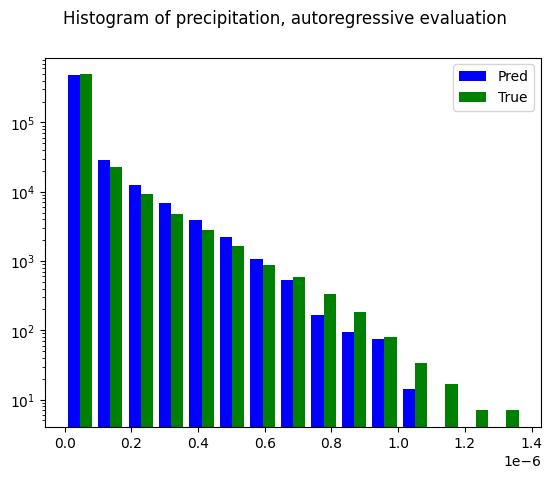

In [159]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([prec_pred.flatten(),prec_true.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of precipitation, autoregressive evaluation")
# ens3_prevprec_srules-CRPS-sumvar_partiallystochastic_SLSTM4-144-96_..123344..10_hcon2e-3_TSTEPwcon5e9  49489


Text(0.5, 0.98, 'Histogram of precipitation, autoregressive evaluation')

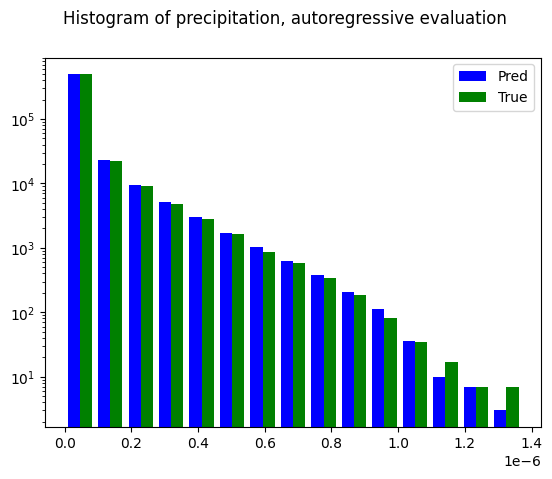

In [17]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([prec_pred.flatten(),prec_true.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of precipitation, autoregressive evaluation")
# LSTM144-144_mp0_2xwcon-xtime,hcon_1233..12,tr=mixed,val=fullreplay


Text(0.5, 0.98, 'Histogram of precipitation, autoregressive evaluation')

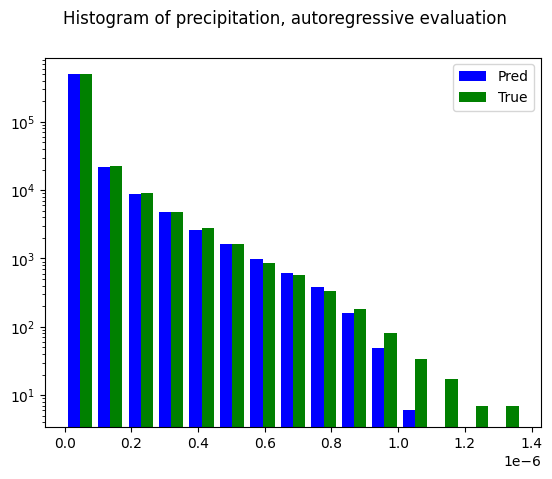

In [17]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([prec_pred.flatten(),prec_true.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of precipitation, autoregressive evaluation")
# tr=Mixed,ens2_srules-es


Text(0.5, 0.98, 'Histogram of precipitation, autoregressive evaluation')

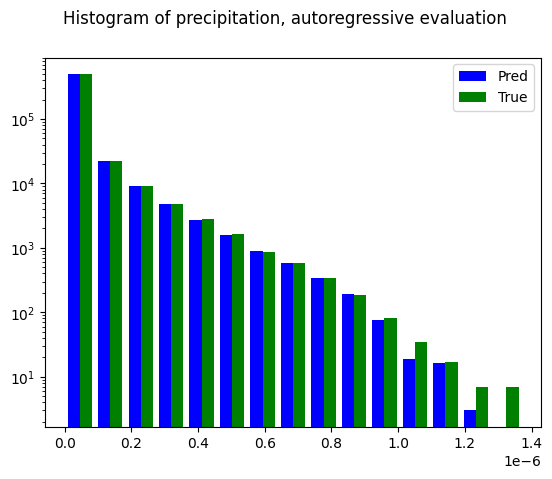

In [31]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([prec_pred.flatten(),prec_true.flatten()],bins=15,color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of precipitation, autoregressive evaluation")
# tr=Mixed,ens3_srules-es_partstochastic_SLSTM4-160-96_..122..5_hcon1e-3_wcon5e10(tstep=1)  precmse6e16


Text(0.5, 0.98, 'Histogram of cloud liquid tendencies, autoreg')

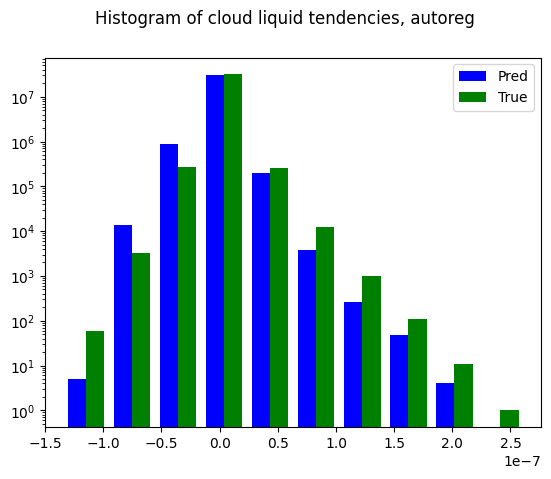

In [160]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([y_pred[:,:,:,2].flatten(),y_true[:,:,:,2].flatten()],color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of cloud liquid tendencies, autoreg")


Text(0.5, 0.98, 'Histogram of cloud liquid tendencies, autoreg')

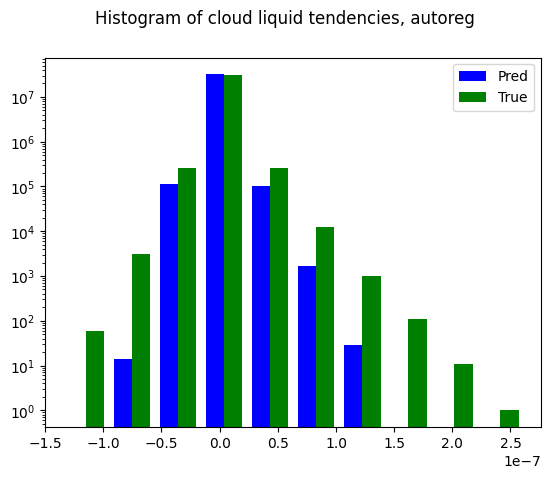

In [18]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([y_pred[:,:,:,2].flatten(),y_true[:,:,:,2].flatten()],color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of cloud liquid tendencies, autoreg")
# # LSTM144-144_mp0_2xwcon-xtime,hcon_1233..12,tr=mixed,val=fullreplay


Text(0.5, 0.98, 'Histogram of cloud liquid tendencies, noprevtend')

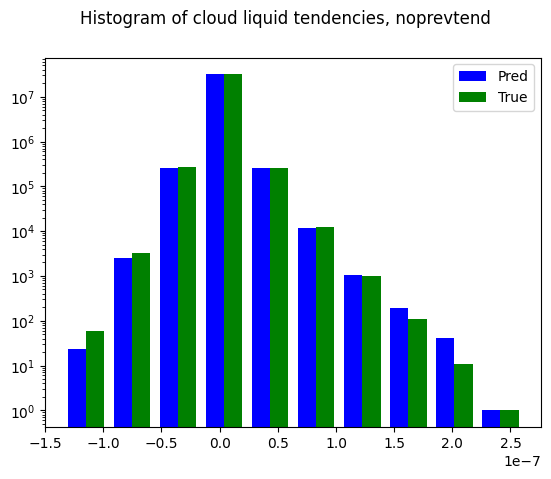

In [44]:
colors = ['b','g']
fig, ax1 = plt.subplots()
ax1.hist([y_pred[:,:,:,2].flatten(),y_true[:,:,:,2].flatten()],color=colors)
ax1.set_yscale('log')
ax1.legend(['Pred','True'])
fig.suptitle("Histogram of cloud liquid tendencies, noprevtend")


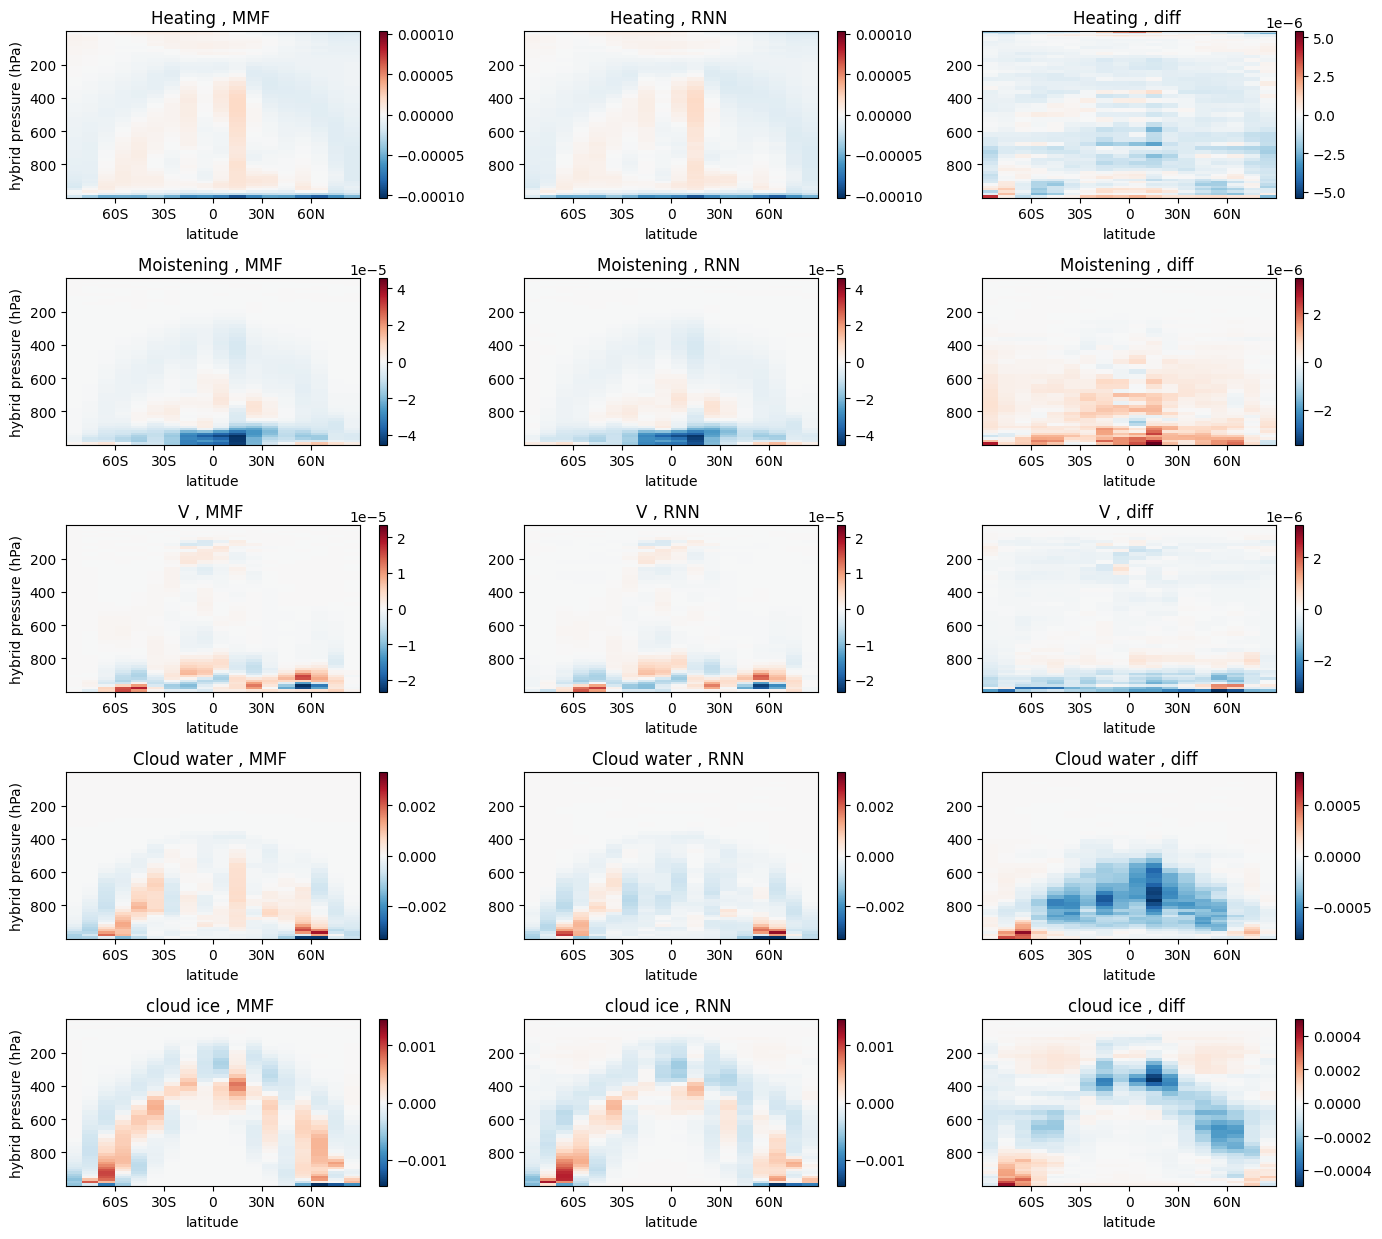

In [22]:
dt_t_mean = y_true[:,:,:,0].mean(axis=0)
dt_p_mean = y_pred[:,:,:,0].mean(axis=0)
q_t_mean = y_true[:,:,:,1].mean(axis=0)
q_p_mean = y_pred[:,:,:,1].mean(axis=0)
clw_t_mean = y_true[:,:,:,2].mean(axis=0)
clw_p_mean = y_pred[:,:,:,2].mean(axis=0)
cli_t_mean = y_true[:,:,:,3].mean(axis=0)
cli_p_mean = y_pred[:,:,:,3].mean(axis=0)
cltot_p_mean = (y_pred[:,:,:,2]+y_pred[:,:,:,3]).mean(axis=0)
u_t_mean = y_true[:,:,:,4].mean(axis=0)
u_p_mean = y_pred[:,:,:,4].mean(axis=0)
v_t_mean = y_true[:,:,:,5].mean(axis=0)
v_p_mean = y_pred[:,:,:,5].mean(axis=0)
gc.collect()


vars_stacked = [[dt_t_mean,dt_p_mean], 
                [q_t_mean,q_p_mean],
                # [u_t_mean,u_p_mean], 
                [v_t_mean,v_p_mean],
                [clw_t_mean,clw_p_mean],
                [cli_t_mean,cli_p_mean]]


ds_grid = xr.open_dataset(data_path+'data_grid/ne4pg2_scrip.nc')
grid_area = ds_grid['grid_area']

ds2 = xr.open_dataset(data_path+'data_grid/E3SM_ML.GNUGPU.F2010-MMF1.ne4pg2_ne4pg2.eam.h0.0001-01.nc')
lat = ds2.lat
lon = ds2.lon
level = ds2.lev.values



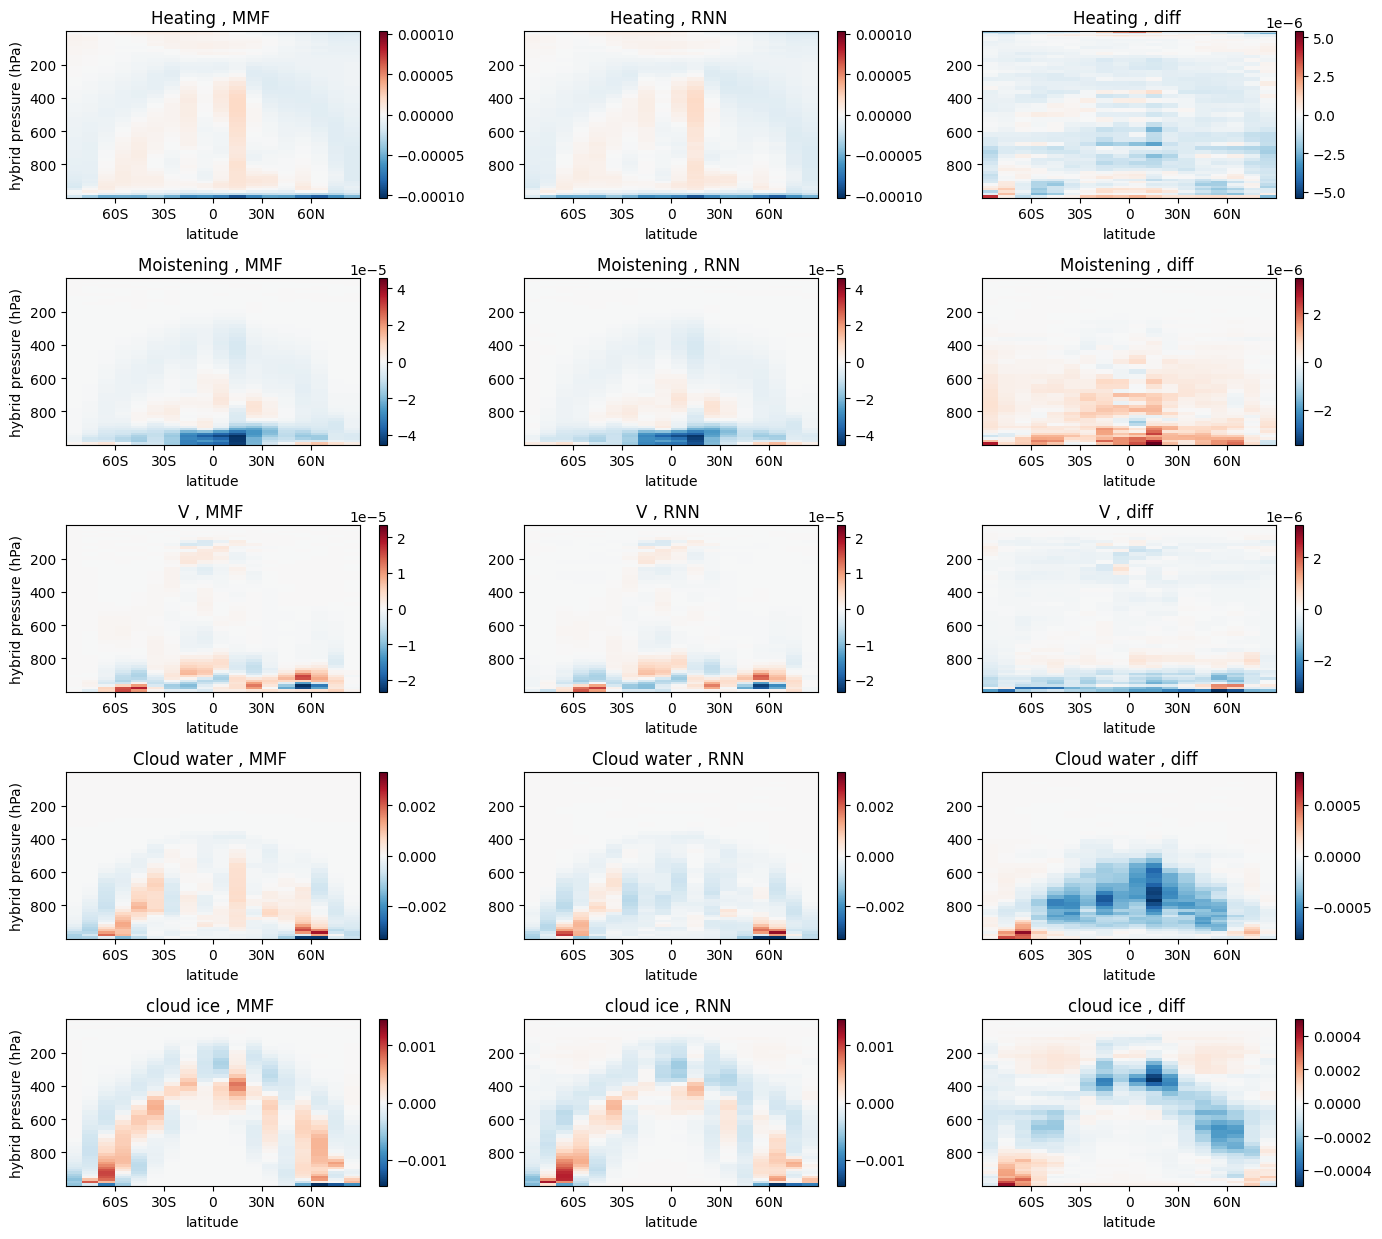

In [28]:
dt_t_mean = y_true[:,:,:,0].mean(axis=0) # (384, 60)
dt_p_mean = y_pred[:,:,:,0].mean(axis=0)
q_t_mean = y_true[:,:,:,1].mean(axis=0)
q_p_mean = y_pred[:,:,:,1].mean(axis=0)
clw_t_mean = y_true[:,:,:,2].mean(axis=0)
clw_p_mean = y_pred[:,:,:,2].mean(axis=0)
cli_t_mean = y_true[:,:,:,3].mean(axis=0)
cli_p_mean = y_pred[:,:,:,3].mean(axis=0)
cltot_p_mean = (y_pred[:,:,:,2]+y_pred[:,:,:,3]).mean(axis=0)
u_t_mean = y_true[:,:,:,4].mean(axis=0)
u_p_mean = y_pred[:,:,:,4].mean(axis=0)
v_t_mean = y_true[:,:,:,5].mean(axis=0)
v_p_mean = y_pred[:,:,:,5].mean(axis=0)
gc.collect()


vars_stacked = [[dt_t_mean,dt_p_mean], 
                [q_t_mean,q_p_mean],
                # [u_t_mean,u_p_mean], 
                [v_t_mean,v_p_mean],
                [clw_t_mean,clw_p_mean],
                [cli_t_mean,cli_p_mean]]

grid_path = '../grid_info/ClimSim_low-res_grid-info.nc'
grid_info = xr.open_dataset(grid_path)
level = grid_info.lev.values
lat = grid_info.lat
grid_area =  grid_info.area

plot_bias(vars_stacked, grid_area, lat, level)

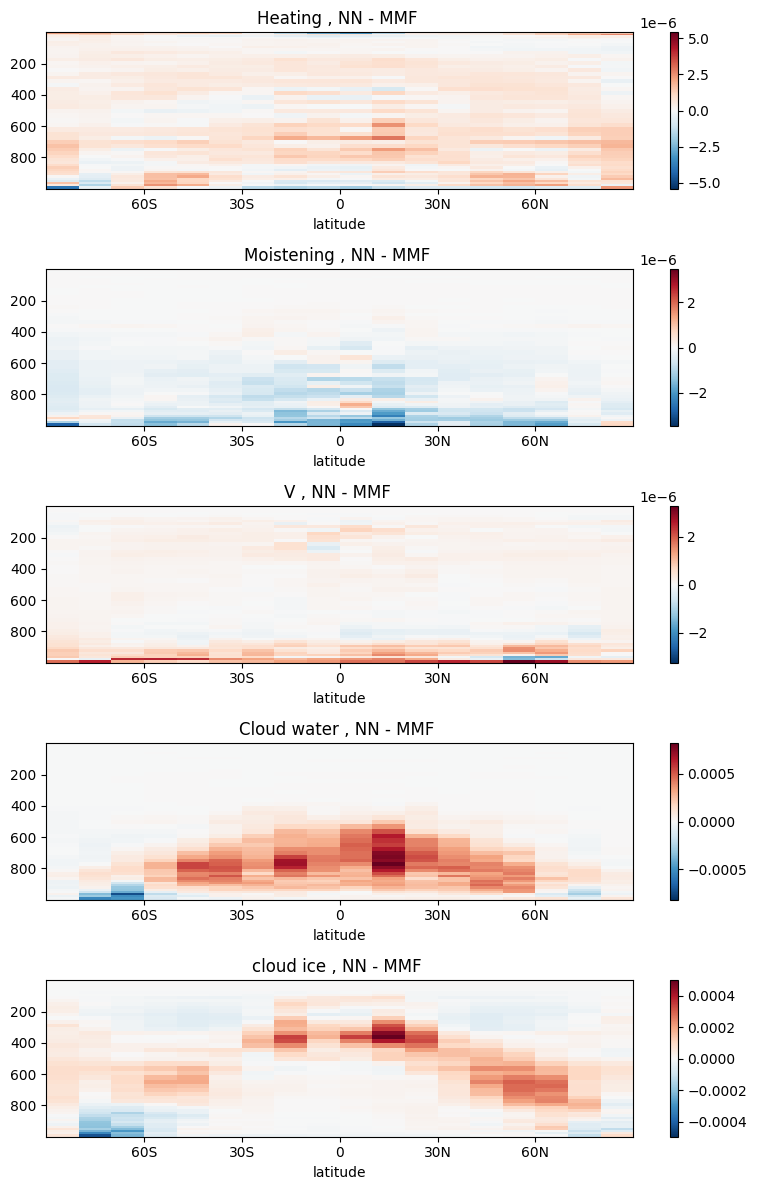

In [39]:
        
def zonal_mean_area_weighted(data, grid_area, lat):
    # Define latitude bins ranging from -90 to 90, each bin spans 10 degrees
    bins = np.arange(-90, 91, 10)  # Create edges for 10 degree bins

    # Get indices for each lat value indicating which bin it belongs to
    bin_indices = np.digitize(lat.values, bins) - 1

    # Initialize a list to store the zonal mean for each latitude bin
    data_zonal_mean = []

    # Iterate through each bin to calculate the weighted average
    for i in range(len(bins)-1):
        # Filter data and grid_area for current bin
        mask = (bin_indices == i)
        data_filtered = data[mask]
        grid_area_filtered = grid_area[mask]

        # Check if there's any data in this bin
        if data_filtered.size > 0:
            # Compute area-weighted average for the current bin
            weighted_mean = np.average(data_filtered, axis=0, weights=grid_area_filtered)
        else:
            # If no data in bin, append NaN or suitable value
            weighted_mean = np.nan

        # Append the result to the list
        data_zonal_mean.append(weighted_mean)

    # Convert list to numpy array
    data_zonal_mean = np.array(data_zonal_mean)

    # The mid points of the bins are used as the representative latitudes
    lats_mid = bins[:-1] + 5

    return data_zonal_mean, lats_mid


def plot_bias_diff(vars_stacked, grid_area, lat, level):
    import xarray as xr
    
    labels=["Heating","Moistening","V","Cloud water", "cloud ice"]
    scalings = [1,1000,1,1e6,1e6]
        
    latitude_ticks = [-60, -30, 0, 30, 60]
    latitude_labels = ['60S', '30S', '0', '30N', '60N']
    
    fig, axs = plt.subplots(len(vars_stacked), 1, figsize=(8, 12)) 
    
    for idx in range(len(vars_stacked)):
        var_diff = vars_stacked[idx]
        
        zm, lats_sorted = zonal_mean_area_weighted(var_diff, grid_area, lat)
                
        scaling = scalings[idx]
        data_diff = scaling * xr.DataArray(zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
                                         coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})
            
        # Determine color scales
        vmax_diff = max(data_diff.max(), -data_diff.min())

        # Plot each variable in its row
    
        data_diff.plot(ax=axs[idx], add_colorbar=True, cmap='RdBu_r', vmin=-vmax_diff, vmax=vmax_diff)
        axs[idx].set_title("{} , {} ".format(labels[idx],'NN - MMF'))
        axs[idx].invert_yaxis()
        axs[idx].set_ylabel('')  # Clear the y-label to clean up plot
    
    for ax in axs:
        ax.set_xticks(latitude_ticks)  # Set the positions for the ticks
        ax.set_xticklabels(latitude_labels)  # Set the custom text labels
    plt.tight_layout()

    return fig
    #plt.tight_layout()
    #plt.show() 
    
dt_diff = dt_t_mean - dt_p_mean 
q_diff = q_t_mean- q_p_mean
v_diff = v_t_mean - v_p_mean
clw_diff = clw_t_mean - clw_p_mean
cli_diff = cli_t_mean - cli_p_mean

vars_stacked = [dt_diff, q_diff, v_diff, clw_diff, cli_diff]
fig = plot_bias_diff(vars_stacked, grid_area, lat, level)

In [64]:
# How correlated are the errors of the different members?            
dqt = y_true[:,:,:,1] # water vapor
dqt_mean = np.mean(dqt,axis=0)
dqp1 = outs_lev[0,:,:,:,1]
dqp2 = outs_lev[1,:,:,:,1]
dqp3 = outs_lev[2,:,:,:,1]

dqp1_er = dqt - dqp1 
dqp2_er = dqt - dqp2
dqp3_er = dqt - dqp3
np.corrcoef(dqp1_er.flatten(),dqp2_er.flatten())
# newCRPS -prevt: 0.53197246
# newCRPS sumvar ens3 noprevt  0.549
# prevT  49330:   0.99683849
# same, autoreg:  0.97176491]

array([[1.        , 0.97176491],
       [0.97176491, 1.        ]])

In [34]:
# How correlated are the errors of the different members?            
dqt = y_true[:,:,:,1] # water vapor
dqt_mean = np.mean(dqt,axis=0)
dqp1 = outs_lev[0,:,:,:,1]
dqp2 = outs_lev[1,:,:,:,1]
dqp3 = outs_lev[2,:,:,:,1]

dqp1_er = dqt - dqp1 
dqp2_er = dqt - dqp2
dqp3_er = dqt - dqp3
np.corrcoef(dqp1_er.flatten(),dqp2_er.flatten())

array([[1.        , 0.99994464],
       [0.99994464, 1.        ]])

In [34]:
dqp1_er.mean()

np.float32(-7.799384e-11)

In [24]:
# Error = true - pred AFTER removing bias
dqp_mean = np.mean(np.mean(outs_lev[:,:,:,:,1],axis=0),axis=0)
print(dqp_mean.shape)
bias_error = dqt_mean - dqp_mean

(384, 60)


In [28]:
dqp1_er = (dqt - bias_error) - dqp2
dqp2_er = (dqt - bias_error) - dqp2
dqp3_er = (dqt - bias_error) - dqp3
np.corrcoef(dqp1_er.flatten(),dqp2_er.flatten())

array([[1., 1.],
       [1., 1.]])

In [36]:
dqp1_er = (dqt - dqp1) - bias_error
dqp2_er = (dqt - dqp2) - bias_error
np.corrcoef(dqp1_er.flatten(),dqp2_er.flatten())

array([[1.        , 0.52781827],
       [0.52781827, 1.        ]])

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

    
def zonal_mean_area_weighted(data, grid_area, lat):
    # Define latitude bins ranging from -90 to 90, each bin spans 10 degrees
    bins = np.arange(-90, 91, 10)  # Create edges for 10 degree bins

    # Get indices for each lat value indicating which bin it belongs to
    bin_indices = np.digitize(lat.values, bins) - 1

    # Initialize a list to store the zonal mean for each latitude bin
    data_zonal_mean = []

    # Iterate through each bin to calculate the weighted average
    for i in range(len(bins)-1):
        # Filter data and grid_area for current bin
        mask = (bin_indices == i)
        data_filtered = data[mask]
        grid_area_filtered = grid_area[mask]

        # Check if there's any data in this bin
        if data_filtered.size > 0:
            # Compute area-weighted average for the current bin
            weighted_mean = np.average(data_filtered, axis=0, weights=grid_area_filtered)
        else:
            # If no data in bin, append NaN or suitable value
            weighted_mean = np.nan

        # Append the result to the list
        data_zonal_mean.append(weighted_mean)

    # Convert list to numpy array
    data_zonal_mean = np.array(data_zonal_mean)

    # The mid points of the bins are used as the representative latitudes
    lats_mid = bins[:-1] + 5

    return data_zonal_mean, lats_mid

def plot_dq_profile(y,yp,i,j,k):
    min_hpa = 300
    colorlist = ["C0","C1","C2","C3","C4","C5","C6","C7","C8","C9"]
    alpha=0.5
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(9.5, 4.5),
                            layout="constrained")
    icol=0
    axs[icol].plot(y[i,j,:,1],level,'k',linewidth=2)
    ymean = np.mean(yp[:,i,j,:,1],axis=0)
    axs[icol].plot(ymean,level,'--b',linewidth=2)

    nens = yp.shape[0]
    for im in range(nens):
        axs[icol].plot(yp[im,i,j,:,1],level,color=colorlist[im],alpha=alpha)
    axs[icol].legend(['True', 'Pred (ensemble mean)', 'Pred'])
    axs[icol].set_ylim(min_hpa,1000)
    # axs[icol].invert_yaxis()
    axs[icol].set_ylabel("Pressure (hPa)")
    axs[icol].set_xlabel("Water vapor tendency (kg/kg/s)")
    axs[icol].invert_yaxis()

    icol=1
    # axs[icol].plot(y[i,j,:,1],level,'k')
    axs[icol].plot(y[i,j,:,1]-ymean,level,'--b',linewidth=2)
    for im in range(nens):
        axs[icol].plot(y[i,j,:,1]-yp[im,i,j,:,1],level,color=colorlist[im],alpha=alpha)
    im=0
    # axs[icol].plot(y[i,j,:,1]-yp[im,i,j,:,1],level,"r")
    axs[icol].legend(['True - Pred (ensemble mean)','True - Pred'])
    axs[icol].set_ylim(min_hpa,1000)
    # axs[icol].invert_yaxis
    axs[icol].set_ylabel("Pressure (hPa)")
    axs[icol].set_xlabel("Water vapor tendency (kg/kg/s)")
    axs[icol].invert_yaxis()

    # axs[icol].set_yticks(level, minor=True)
    # axs[icol].grid(which="minor")

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ds_grid = xr.open_dataset(data_path+'data_grid/ne4pg2_scrip.nc')
grid_area = ds_grid['grid_area']

ds2 = xr.open_dataset(data_path+'data_grid/E3SM_ML.GNUGPU.F2010-MMF1.ne4pg2_ne4pg2.eam.h0.0001-01.nc')
lat = ds2.lat
lon = ds2.lon
level = ds2.lev.values


    


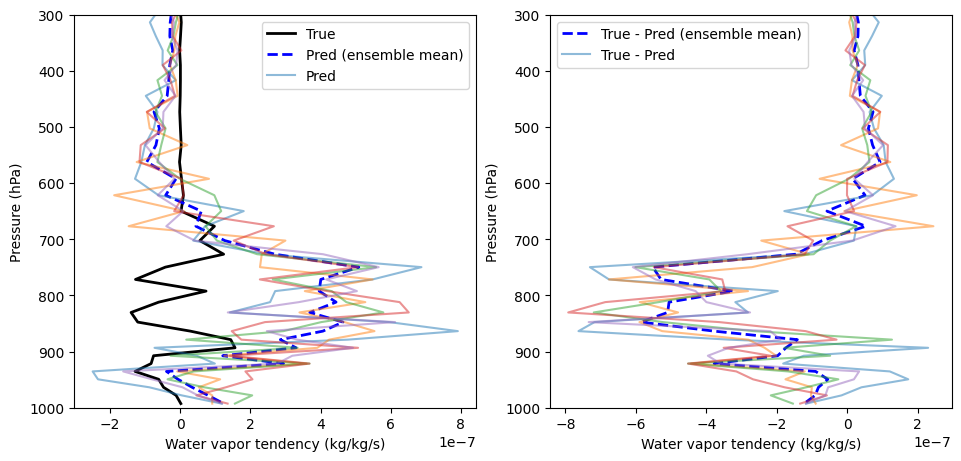

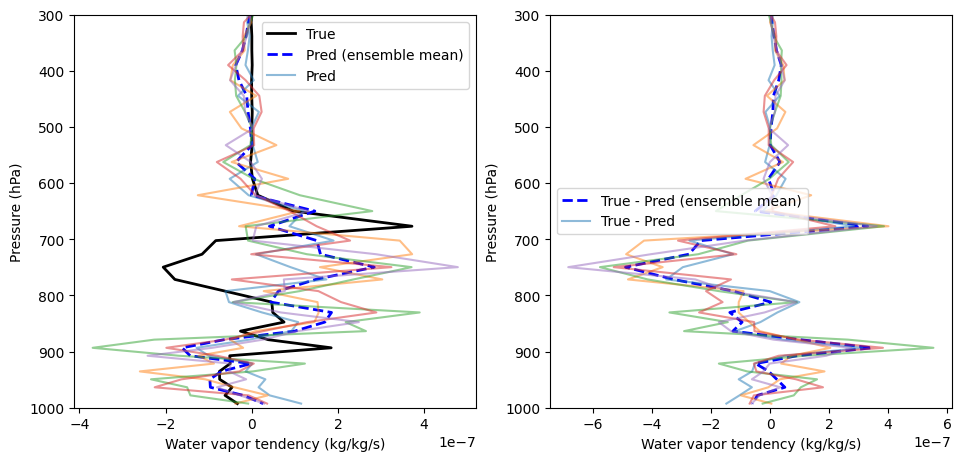

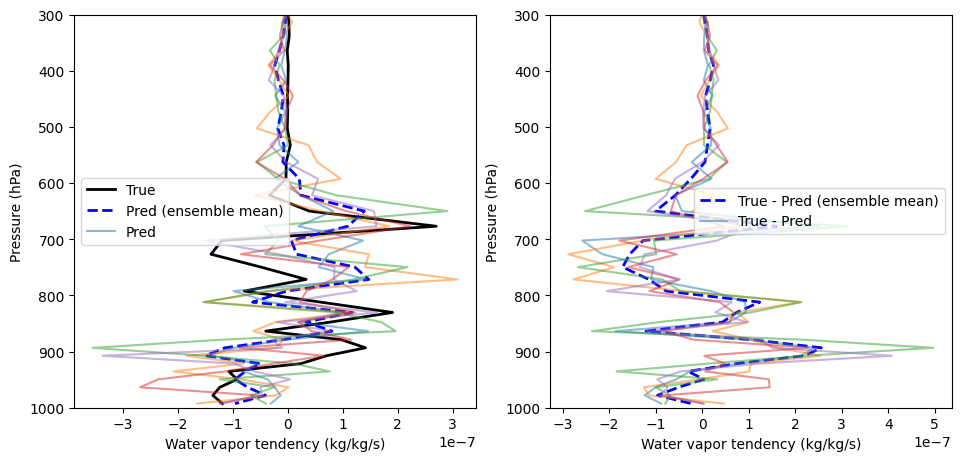

In [47]:
dq_pred = y_pred[:,:,:,1]
dq_true = y_true[:,:,:,1]

ind = np.unravel_index(dq_true.argmax(), dq_true.shape)
ind = np.unravel_index(dq_pred.argmax(), dq_pred.shape)

i,j,k = ind

plot_dq_profile(y_true,outs_lev,i,j,k)
plot_dq_profile(y_true,outs_lev,i+1,j,k)
plot_dq_profile(y_true,outs_lev,i+2,j,k)


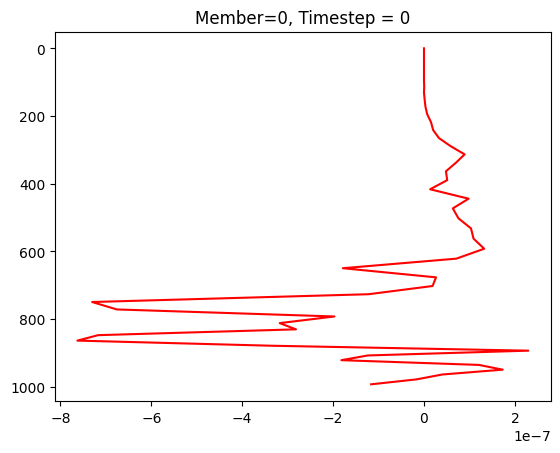

In [49]:

import matplotlib.animation as animation

fig, ax = plt.subplots()

im=0
jtime = 0 
timestep = i + jtime
line, = ax.plot(y_true[i,j,:,1]-outs_lev[im,i,j,:,1],level,"r")
ax.set_title('Member=0, Timestep = {}'.format(0))
ax.invert_yaxis()

def animate(jtime):
    line.set_xdata(y_true[i+jtime,j,:,1]-outs_lev[im,i+jtime,j,:,1])  # update the data.
    ax.set_title('Error for Member=0, Timestep = {}'.format(jtime+1))
    return line,

ani = animation.FuncAnimation(
    fig, animate, frames=10,interval=1000) # interval=20, blit=True, save_count=50)
plt.show()


/data/piptorch/lib/python3.12/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


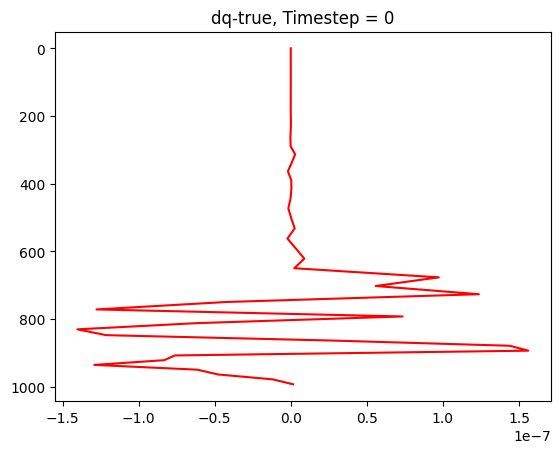

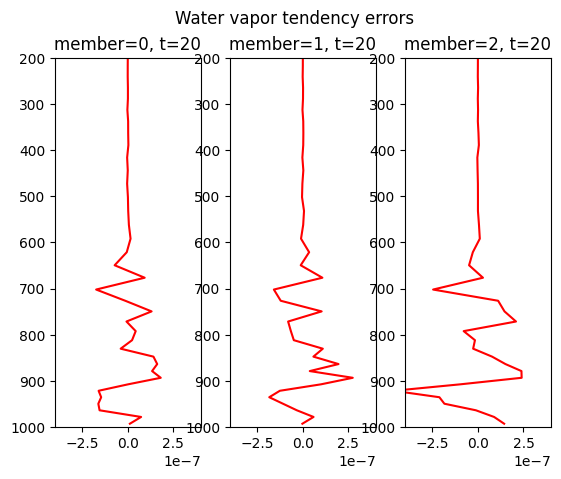

In [50]:
fig, ax = plt.subplots()
im=0
jtime = 0 
timestep = i + jtime
line, = ax.plot(y_true[i,j,:,1],level,"r")
ax.set_title('dq-true, Timestep = {}'.format(0))
ax.invert_yaxis()

def animate(jtime):
    line.set_xdata(y_true[i+jtime,j,:,1])  # update the data.
    ax.set_title('dq-true, Timestep = {}'.format(jtime+1))
    return line,

ani = animation.FuncAnimation(
    fig, animate, frames=10,interval=1000) # interval=20, blit=True, save_count=50)
plt.show()


fig, ax = plt.subplots(ncols=3)
fig.suptitle("Water vapor tendency errors")
im=0
jtime = 0 
min_hpa = 200
line, = ax[0].plot(y_true[i,j,:,1]-outs_lev[0,i,j,:,1],level,"r")
line2, = ax[1].plot(y_true[i,j,:,1]-outs_lev[1,i,j,:,1],level,"r")
line3, = ax[2].plot(y_true[i,j,:,1]-outs_lev[2,i,j,:,1],level,"r")

ax[0].set_title('member={}, t={}'.format(0,jtime))
ax[1].set_title('member={}, t={}'.format(1,jtime))
ax[2].set_title('member={}, t={}'.format(2,jtime))

ax[0].set_ylim(min_hpa,1000); ax[1].set_ylim(min_hpa,1000); ax[2].set_ylim(min_hpa,1000)
ax[0].invert_yaxis(); ax[1].invert_yaxis(); ax[2].invert_yaxis()
ax[0].set_xlim([-4.0e-7,4.0e-7]); ax[1].set_xlim([-4.0e-7,4.0e-7]); ax[2].set_xlim([-4.0e-7,4.0e-7])

def animate(jtime):
    line.set_xdata(y_true[i+jtime,j,:,1]-outs_lev[0,i+jtime,j,:,1])  # update the data.
    ax[0].set_title('member={}, t={}'.format(0,jtime+1))
    line2.set_xdata(y_true[i+jtime,j,:,1]-outs_lev[1,i+jtime,j,:,1])  # update the data.
    ax[1].set_title('member={}, t={}'.format(1,jtime+1))
    line3.set_xdata(y_true[i+jtime,j,:,1]-outs_lev[2,i+jtime,j,:,1])  # update the data.
    ax[2].set_title('member={}, t={}'.format(2,jtime+1))
    return line,line2, line3

# ani = animation.FuncAnimation(
#     fig, animate, frames=10,interval=1000) # interval=20, blit=True, save_count=50)

ani = animation.FuncAnimation(
    fig, animate, frames=20,interval=1500) # interval=20, blit=True, save_count=50)

writergif = animation.PillowWriter(fps=1)
ani.save('/data/gdrive/postdoc/results/ClimSim/anim_srnn_errors_newcrps_noprevt.gif',writer=writergif)


plt.show()


In [24]:
if nens>1:
    stochastic=True
else:
    stochsatic=False 
    
labels=["Heating","Moistening","V","Cloud water", "cloud ice"]
scalings = [1,1000,1,1e6,1e6]

# max_diffs = [40,5]

latitude_ticks = [-60, -30, 0, 30, 60]
latitude_labels = ['60S', '30S', '0', '30N', '60N']

# zonal plots of BIAS, MAE 
qn_true = y_true[:,:,:,2]  + y_true[:,:,:,3]
qn_pred = y_pred[:,:,:,2]  + y_pred[:,:,:,3]

mae_dt = np.mean(np.abs(y_true[:,:,:,0] - y_pred[:,:,:,0]),axis=0)
mae_dq = np.mean(np.abs(y_true[:,:,:,1] - y_pred[:,:,:,1]),axis=0)
mae_clw = np.mean(np.abs(y_true[:,:,:,2] - y_pred[:,:,:,2]),axis=0)
mae_cli = np.mean(np.abs(y_true[:,:,:,3] - y_pred[:,:,:,3]),axis=0)
mae_qn = np.mean(np.abs(qn_true - qn_pred),axis=0)

R2_dt = np.zeros((384,60))
R2_dq = np.zeros((384,60))
R2_clw = np.zeros((384,60))
R2_cli = np.zeros((384,60))
#R2_qn = np.zeros((384,60))
if stochastic:
    z_mean_fac_dt = np.zeros((384,60)) 
    z_mean_fac_dq = np.zeros((384,60)) 
    z_mean_fac_clw = np.zeros((384,60)) 
    z_mean_fac_cli = np.zeros((384,60)) 

mean_abs_dt = np.zeros((384,60))
mean_abs_dq = np.zeros((384,60))
mean_abs_clw = np.zeros((384,60))
mean_abs_cli = np.zeros((384,60))

for i in range(384): 
    for j in range(60):
        R2_dt[i,j] =  np.corrcoef(y_true[:,i,j,0], y_pred[:,i,j,0])[0,1]**2
        R2_dq[i,j] =  np.corrcoef(y_true[:,i,j,1], y_pred[:,i,j,1])[0,1]**2
        R2_clw[i,j] =  np.corrcoef(y_true[:,i,j,2], y_pred[:,i,j,2])[0,1]**2
        R2_cli[i,j] =  np.corrcoef(y_true[:,i,j,3], y_pred[:,i,j,3])[0,1]**2
      #  R2_qn[i,j] =  np.corrcoef(qn_true[:,i,j], qn_pred[:,i,j])[0,1]**2
      
        mean_abs_dt[i,j] = np.mean(np.abs(y_true[:,i,j,0]))
        mean_abs_dq[i,j] = np.mean(np.abs(y_true[:,i,j,1]))
        mean_abs_clw[i,j] = np.mean(np.abs(y_true[:,i,j,2]))
        mean_abs_cli[i,j] = np.mean(np.abs(y_true[:,i,j,3])) 
        
        if stochastic:
            z_mean_fac_dt[i,j] =  np.mean(outs_lev_std[:,i,j,0]) / np.mean(np.abs(y_pred[:,i,j,0]))
            z_mean_fac_dq[i,j] =  np.mean(outs_lev_std[:,i,j,1])  / np.mean(np.abs(y_pred[:,i,j,1]))
            z_mean_fac_clw[i,j] =  np.mean(outs_lev_std[:,i,j,2])  / np.mean(np.abs(y_pred[:,i,j,2]))
            z_mean_fac_cli[i,j] =  np.mean(outs_lev_std[:,i,j,3])  / np.mean(np.abs(y_pred[:,i,j,3]))

# z = outs_lev - outs_lev_det

if stochastic:
    z_mean_fac_clw[z_mean_fac_clw>100] = np.nan
    z_mean_fac_cli[z_mean_fac_cli>100] = np.nan




/data/piptorch/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/tmp/ipykernel_1871268/4007760742.py:55: RuntimeWarning: invalid value encountered in scalar divide
  z_mean_fac_dq[i,j] =  np.mean(outs_lev_std[:,i,j,1])  / np.mean(np.abs(y_pred[:,i,j,1]))
/tmp/ipykernel_1871268/4007760742.py:56: RuntimeWarning: invalid value encountered in scalar divide
  z_mean_fac_clw[i,j] =  np.mean(outs_lev_std[:,i,j,2])  / np.mean(np.abs(y_pred[:,i,j,2]))
/tmp/ipykernel_1871268/4007760742.py:57: RuntimeWarning: invalid value encountered in scalar divide
  z_mean_fac_cli[i,j] =  np.mean(outs_lev_std[:,i,j,3])  / np.mean(np.abs(y_pred[:,i,j,3]))
/data/piptorch/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


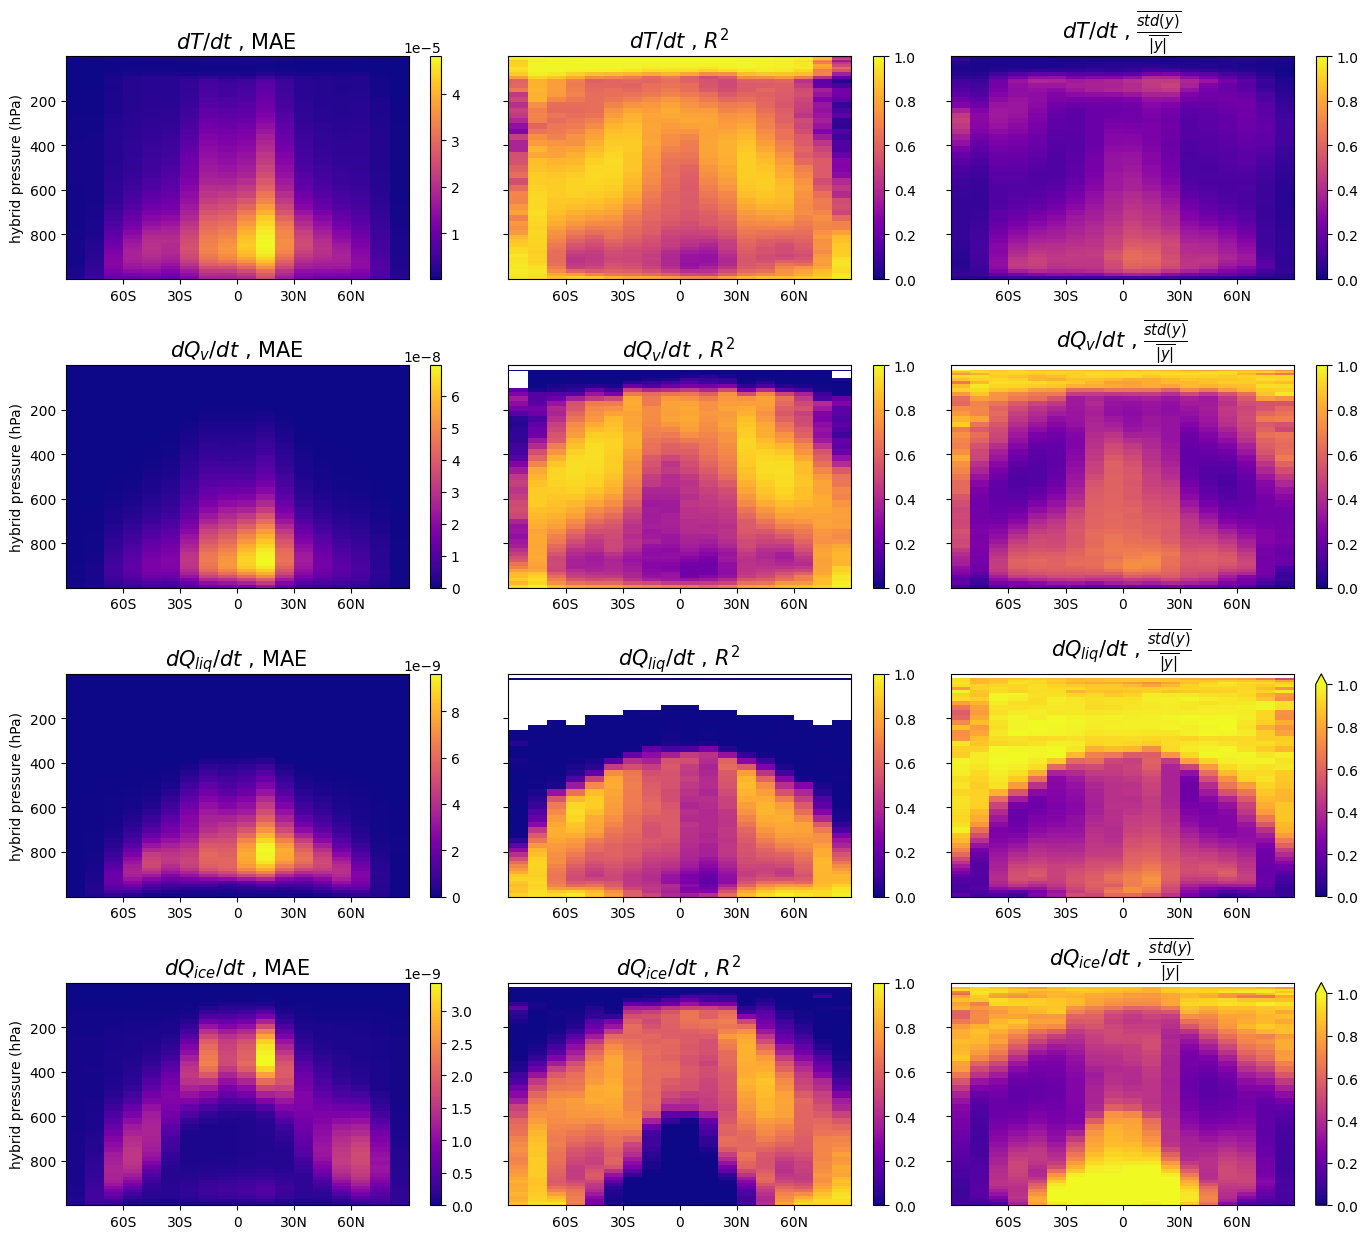

In [25]:
fs_label = 15

if stochastic:
    vars_stacked2 = [[mae_dt,R2_dt, z_mean_fac_dt], 
                     [mae_dq,R2_dq, z_mean_fac_dq], 
                    [mae_clw,R2_clw, z_mean_fac_clw], 
                    [mae_cli,R2_cli, z_mean_fac_cli]]#,
                     # [mae_qn,R2_qn]]
    
    labels2=[r"$dT/dt$", r"$dQ_v/dt$", r"$dQ_{liq}/dt$", r"$dQ_{ice}/dt$"]
    
    fig, axs = plt.subplots(len(vars_stacked2), 3, figsize=(14, 12.5)) 
    
    for idx in range(len(vars_stacked2)):
        # var_mae, var_r2, var_y, var_z = vars_stacked2[idx]
        var_mae, var_r2, var_z = vars_stacked2[idx]

        mae_zm, lats_sorted = zonal_mean_area_weighted(var_mae, grid_area, lat)
        r2_zm, lats_sorted = zonal_mean_area_weighted(var_r2, grid_area, lat)
        # y_zm, lats_sorted = zonal_mean_area_weighted(var_y, grid_area, lat)
        z_zm, lats_sorted = zonal_mean_area_weighted(var_z, grid_area, lat)

        # data_sp, data_nn = 1e6*sp_zm.T, 1e6*nn_zm.T
        
        scaling = 1
        data_mae = scaling * xr.DataArray(mae_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
                                         coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})
        data_r2 = scaling * xr.DataArray(r2_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
                                         coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})
        # data_y = scaling * xr.DataArray(y_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
        #                                  coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})        
        data_z = scaling * xr.DataArray(z_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
                                         coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})           
        # Determine color scales
        vmax1 = data_mae.max()
        vmin1 = data_mae.min()
        vmax2 = 1.0
        vmin2 = 0.0
        
        data_mae.plot(ax=axs[idx, 0], add_colorbar=True, cmap='plasma', vmin=vmin1, vmax=vmax1)
        # axs[idx, 0].set_title(f'{labels[idx * 3]} {var_title} ({unit}): MMF')
        axs[idx, 0].set_title("{} , {} ".format(labels2[idx],'MAE'),fontsize=fs_label)
        axs[idx, 0].invert_yaxis()

        data_r2.plot(ax=axs[idx, 1], add_colorbar=True, cmap='plasma', vmin=vmin2, vmax=vmax2)
        axs[idx, 1].set_title("{} , {} ".format(labels2[idx], r'$R^2$'),fontsize=fs_label)
        axs[idx, 1].invert_yaxis()
        axs[idx, 1].set_ylabel('')  # Clear the y-label to clean up plot
        
        # data_y.plot(ax=axs[idx, 2], add_colorbar=True, cmap='plasma')#, vmin=vmin2, vmax=vmax2)
        # axs[idx, 2].set_title("{} , {} ".format(labels2[idx], r'mean(y)'))
        # axs[idx, 2].invert_yaxis()
        # axs[idx, 2].set_ylabel('')  # Clear the y-label to clean up plot
        
        data_z.plot(ax=axs[idx, 2], add_colorbar=True, cmap='plasma', vmin=vmin2, vmax=vmax2)
        axs[idx, 2].set_title("{} , {} ".format(labels2[idx], r"$\frac{\overline{std(y)}}{\overline{|y|}}$"),fontsize=fs_label)
        axs[idx, 2].invert_yaxis()
        axs[idx, 2].set_ylabel('')  # Clear the y-label to clean up plot

        # if idx < (len(vars_stacked2)-1):
        axs[idx, 0].set_xlabel('')  # Clear the y-label to clean up plot
        axs[idx, 1].set_xlabel('')  # Clear the y-label to clean up plot
        axs[idx, 2].set_xlabel('')  # Clear the y-label to clean up plot

        axs[idx, 1].set_yticklabels('')
        axs[idx, 2].set_yticklabels('')

    # Set these ticks and labels for each subplot
    for ax_row in axs:
        for ax in ax_row:
            ax.set_xticks(latitude_ticks)  # Set the positions for the ticks
            ax.set_xticklabels(latitude_labels)  # Set the custom text labels
    plt.tight_layout()
    plt.show() 

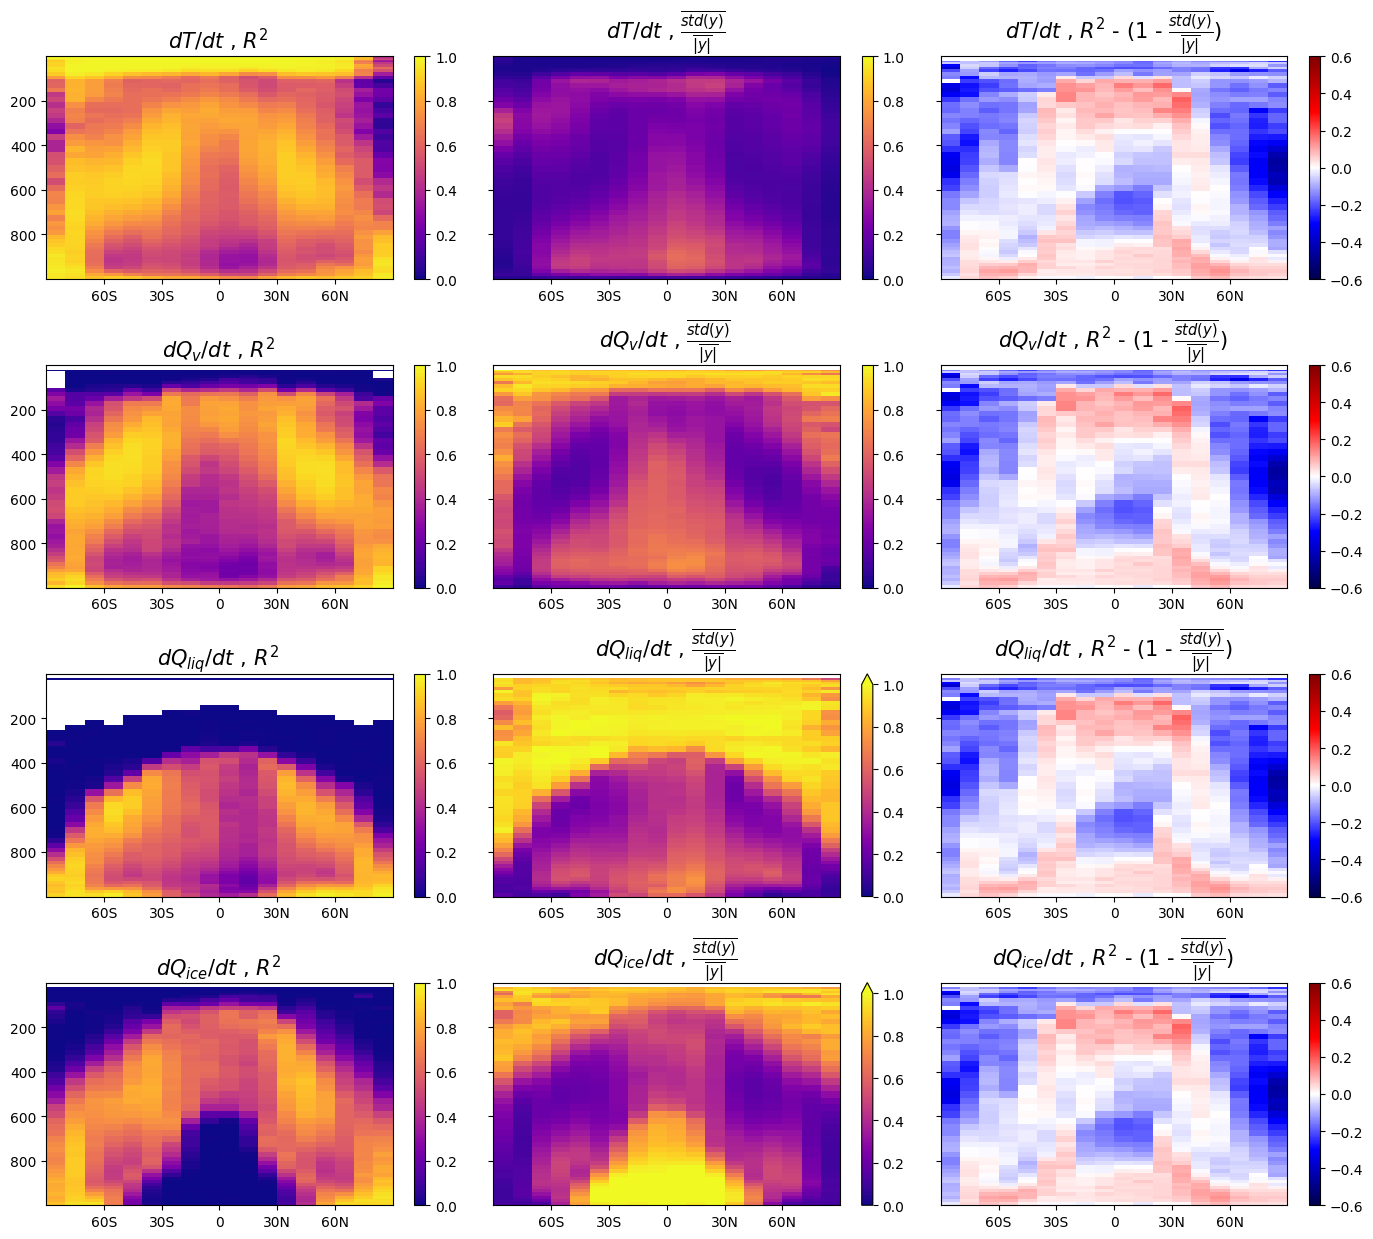

In [26]:
data_var3 = data_r2 - (1-data_z)

if stochastic:

    labels2=[r"$dT/dt$", r"$dQ_v/dt$", r"$dQ_{liq}/dt$", r"$dQ_{ice}/dt$"]
    
    fig, axs = plt.subplots(len(vars_stacked2), 3, figsize=(14, 12.5)) 
    
    for idx in range(len(vars_stacked2)):
        # var_mae, var_r2, var_y, var_z = vars_stacked2[idx]
        var_mae, var_r2, var_z = vars_stacked2[idx]

        mae_zm, lats_sorted = zonal_mean_area_weighted(var_mae, grid_area, lat)
        r2_zm, lats_sorted = zonal_mean_area_weighted(var_r2, grid_area, lat)
        # y_zm, lats_sorted = zonal_mean_area_weighted(var_y, grid_area, lat)
        z_zm, lats_sorted = zonal_mean_area_weighted(var_z, grid_area, lat)

        # data_sp, data_nn = 1e6*sp_zm.T, 1e6*nn_zm.T
        
        scaling = 1
        data_mae = scaling * xr.DataArray(mae_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
                                         coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})
        data_r2 = scaling * xr.DataArray(r2_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
                                         coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})
        # data_y = scaling * xr.DataArray(y_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
        #                                  coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})        
        data_z = scaling * xr.DataArray(z_zm[:, :].T, dims=["hybrid pressure (hPa)", "latitude"],
                                         coords={"hybrid pressure (hPa)": level, "latitude": lats_sorted})           
        # Determine color scales
        vmax2 = 1.0
        vmin2 = 0.0
        vmax3 = 0.6
        vmin3 = -0.6
        
        data_r2.plot(ax=axs[idx, 0], add_colorbar=True, cmap='plasma', vmin=vmin2, vmax=vmax2)
        axs[idx, 0].set_title("{} , {} ".format(labels2[idx], r'$R^2$'),fontsize=fs_label)
        axs[idx, 0].invert_yaxis()
        axs[idx, 0].set_ylabel('')  # Clear the y-label to clean up plot
        
        data_z.plot(ax=axs[idx, 1], add_colorbar=True, cmap='plasma', vmin=vmin2, vmax=vmax2)
        axs[idx, 1].set_title("{} , {} ".format(labels2[idx], r"$\frac{\overline{std(y)}}{\overline{|y|}}$"),fontsize=fs_label)
        axs[idx, 1].invert_yaxis()
        axs[idx, 1].set_ylabel('')  # Clear the y-label to clean up plot

        data_var3.plot(ax=axs[idx, 2], add_colorbar=True, cmap='seismic', vmin=vmin3, vmax=vmax3)
        axs[idx, 2].set_title("{} , {} ".format(labels2[idx], r"$R^2$ - (1 - $\frac{\overline{std(y)}}{\overline{|y|}})$"),fontsize=fs_label)
        axs[idx, 2].invert_yaxis()
        axs[idx, 2].set_ylabel('')  # Clear the y-label to clean up plot

        axs[idx, 0].set_xlabel('')  # Clear the y-label to clean up plot
        axs[idx, 1].set_xlabel('')  # Clear the y-label to clean up plot
        axs[idx, 2].set_xlabel('')  # Clear the y-label to clean up plot

        axs[idx, 1].set_yticklabels('')
        axs[idx, 2].set_yticklabels('')

    # Set these ticks and labels for each subplot
    for ax_row in axs:
        for ax in ax_row:
            ax.set_xticks(latitude_ticks)  # Set the positions for the ticks
            ax.set_xticklabels(latitude_labels)  # Set the custom text labels
    plt.tight_layout()
    plt.show() 